<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Introduction to Clustering
    </h1></td>
    <td width="30%">
    <div style="text-align: right">
    <b> Practical Data Science Lessons</b><br><br>
    <b> Riccardo Bertoglio</b><br>
    <a href="mailto:riccardo.bertoglio@polimi.it">riccardo.bertoglio@polimi.it</a><br>
    </div>
</tr>
</table>

## Learning outcomes 🔎


*   What is Clustering?
*   Distance Metrics
*   Standardization for Clustering
*   Agglomerative (or Hierarchical) Clustering
    * Linkage Matrix
    * The Dendrogram
    * Linkage Methods
*   K-Means Clustering
*   DBSCAN Clustering
*   Evaluation Metrics for Clustering
*   Deciding the Number of Clusters
*   Comparing Clustering Algorithms on Synthetic Data

#### Resources:
* **Theory:**
    *   *[An Introduction to Statistical Learning](https://www.statlearning.com)*
    *   K-Means:
        *   *[K-Means StatQuest YouTube video](https://youtu.be/4b5d3muPQmA?si=ChIcwBpU1M6THIXZ)*
        *   *[K-Means Stanford CS221 course notes](https://stanford.edu/~cpiech/cs221/handouts/kmeans.html)*
* **Practice:**
    *   *[scikit-learn User Guide](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)*
    *   *[Harvard 2022 CS109-B: Advanced Topics in Data Science](https://harvard-iacs.github.io/2022-CS109B)*
    *   *[Cheat sheet for implementing 7 methods for selecting the optimal number of clusters in Python](https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad)*

## What is Clustering?
Clustering is a technique in **unsupervised machine learning** where the goal is to **group similar data points** together based on certain features or characteristics. The objective is to maximize the similarity within clusters and minimize the similarity between different clusters. Unlike supervised learning, clustering does not involve labeled output; it focuses on finding hidden patterns or structures within the data.

### Applications of clustering
* **Anomaly Detection**: By grouping normal patterns together, clustering can highlight anomalies or outliers that do not conform to the majority of data points. This is particularly useful in detecting unusual behavior or identifying potential errors or fraud.
* **Customer Segmentation**: In business and marketing, clustering is often applied to group customers with similar behaviors, preferences, or demographics. This segmentation can be used for targeted marketing strategies and personalized services.
* **Image and Signal Processing**: Clustering is employed in image and signal processing to group similar pixels or signal patterns together. This can aid in image recognition, compression, and noise reduction.
* **Document Classification and Topic Modeling**: In natural language processing, clustering is used to group documents or texts with similar content. This facilitates tasks such as document classification and topic modeling, making it easier to organize and analyze large text corpora.
* **Feature Engineering**: Clustering can be used as a feature engineering technique, creating new features that represent the cluster memberships of data points. These features can then be used in supervised learning tasks.
* **Recommendation Systems**: Clustering is utilized in recommendation systems to group users with similar preferences. This allows for the recommendation of items or content based on the preferences of users within the same cluster.
* ...

<center>
<img src="./images/spotify_dailymix.png">
</center>

### Applications of clustering in agriculture 🚜
* **Precision Agriculture**: Clustering can help identify homogeneous zones within a field based on soil properties, weather conditions, and crop health. This allows for precision agriculture techniques, such as targeted irrigation, fertilization, and pesticide application.
* **Satellite Image Analysis**: Clustering algorithms can be applied to satellite imagery to classify different types of crops and identify patterns in land use. This information is crucial for monitoring agricultural practices and understanding regional crop dynamics.
* **Crop Rotation Planning**: Clustering helps identify groups of crops that have similar growth requirements. This information can be used to plan effective crop rotations, promoting soil health and preventing the buildup of pests and diseases.
* ...

Importing the packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial import distance

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN

from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist

%matplotlib inline 

In [2]:
from gap_statistic import OptimalK

In [3]:
# If you get the error "ModuleNotFoundError: No module named 'gap_statistic'", uncomment
# the following instructions to install the package gap-stat

# import sys
# !{sys.executable} -m pip install gap-stat

In [4]:
from yellowbrick.cluster import silhouette_visualizer, kelbow_visualizer

⚠ Pay attention: [Importing yellowbrick changes global matplotlib styles!](https://github.com/DistrictDataLabs/yellowbrick/issues/734)

In [5]:
# If you get the error "ModuleNotFoundError: No module named 'yellowbrick'", uncomment
# the following instructions to install the package gap-stat

# import sys
# !{sys.executable} -m pip install yellowbrick

## Distance Metrics 📏
Distance metrics, also known as **dissimilarity measures**, play a crucial role in clustering algorithms by **quantifying the similarity or dissimilarity between data points**. The choice of distance metric depends on the nature of the data and the characteristics of the clustering problem. Here are some commonly used distance metrics in clustering:

### Euclidean distance
This is the most common distance metric, measuring the **straight-line distance between two points** in Euclidean space. It is **sensitive to the scale** of the features. If we are concerned with measuring the distance between two points, $\textbf{p}=(p_1,p_2)$ and $\textbf{q}=(q_1,q_2)$, the distance is:

$d_2(\textbf{p}, \textbf{q}) = \lVert \textbf{p} - \textbf{q} \rVert_2 = \sqrt{{(p_1-q_1)}^2+{(p_2-q_2)}^2}$

For vectors in $\mathbb{R}^n$: 

$d_2(\textbf{p}, \textbf{q}) = \lVert \textbf{p} - \textbf{q} \rVert_2 = \sqrt{{(p_1-q_1)}^2+{(p_2-q_2)}^2+\cdots +{(p_n-q_n)}^2}$

The Euclidean distance is **also called _l2 norm_**.

### Manhattan distance
Manhattan distance is the sum of the absolute differences between the coordinates. It is also **sensitive to the scale** of the features but **less sensitive to outliers** than Euclidean distance.

$d_1(\textbf{p}, \textbf{q}) = \lVert \textbf{p} - \textbf{q} \rVert_1 = \sum_{i=1}^{n} \mid p_i-q_i \mid$

The Manhattan distance is **also called _l1 norm_ or _cityblock distance_**.

### Cosine distance 
It is commonly used in text clustering and is **robust to the magnitude of vectors**.

$d_{cos} = 1 - \cos(\theta)$

where $\cos(\theta)$ is the cosine similarity defined as $\cos(\theta) = \frac{\textbf{p}*\textbf{q}}{\lVert \textbf{p}\rVert \lVert\textbf{q} \rVert} $

### Hamming Distance (extra):

If our two elements of comparison can be represented a sequence of discrete items, it can be useful to measure how many of their elements differ. 

For example:
- `Mahmoud` and `Mahmood` differ by just 1 character and thus have a hamming distance of 1.
- `10101` and `01101` have a hamming distance of 2.
- `Mary` and `Barry` have a hamming distance of 3 (m->b, y->r, null->y).

**Note**: the last example may seem sub-optimal, as we could transform Mary to Barry by just 2 operations (substituting the M with a B, then adding an 'r'). So, their so-called *edit distance* is smaller than their Hamming distance. The very related **Levenshtein distance** [here](https://medium.com/@ethannam/understanding-the-levenshtein-distance-equation-for-beginners-c4285a5604f0) can handle this, and thus tends to be more appropriate for Strings.

### Agglomerative clustering with different metrics
[Example from the scikit-learn User Guide.](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html)

The example is engineered to show the effect of the choice of different metrics. It is applied to waveforms, which can be seen as high-dimensional vector. Indeed, the difference between metrics is usually more pronounced in high dimension (in particular for euclidean and cityblock).

We generate data from three groups of waveforms. Two of the waveforms **(waveform 1 and waveform 2) are proportional one to the other**. The **cosine distance** is invariant to a scaling of the data, as a result, it **cannot distinguish these two waveforms**. Thus even with no noise, clustering using this distance will not separate out waveform 1 and 2.

We add observation noise to these waveforms. We generate very sparse noise: only 6% of the time points contain noise. As a result, the **l1 norm of this noise** (ie “cityblock” distance) is **much smaller than it’s l2 norm** (“euclidean” distance). This **can be seen on the inter-class distance matrices**: the **values on the diagonal**, that characterize the spread of the class, are **much bigger for the Euclidean distance than for the cityblock distance**.

When we apply clustering to the data, we find that the clustering reflects what was in the distance matrices. Indeed, **for the Euclidean distance, the classes are ill-separated because of the noise**, and thus the clustering does not separate the waveforms. For the **cityblock distance, the separation is good** and the waveform classes are recovered. Finally, the **cosine distance does not separate at all waveform 1 and 2**, thus the clustering puts them in the same cluster.

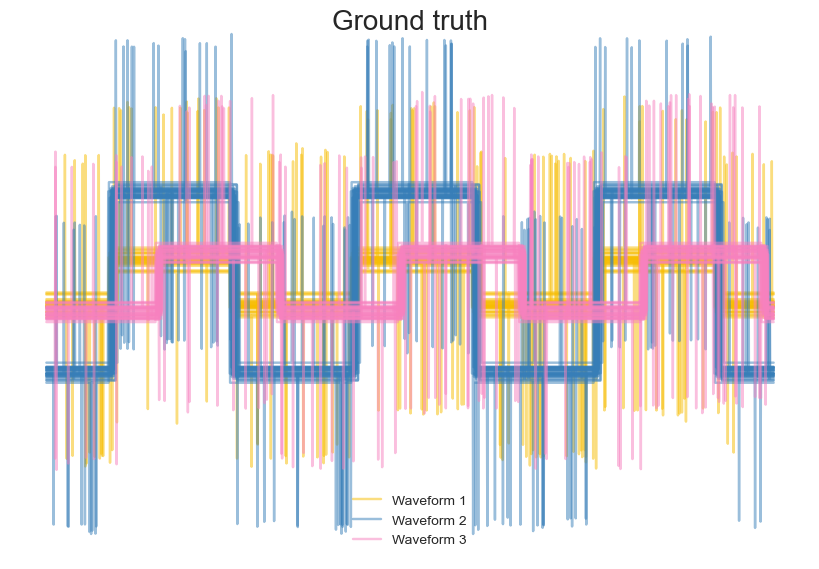

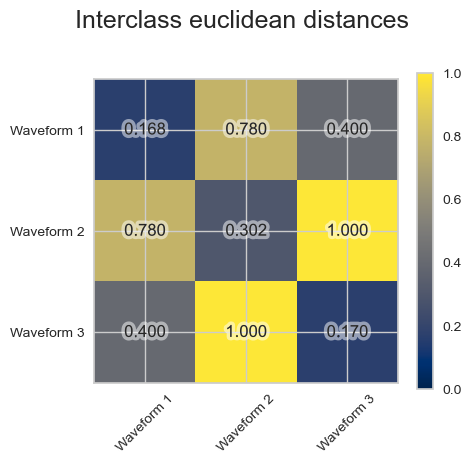

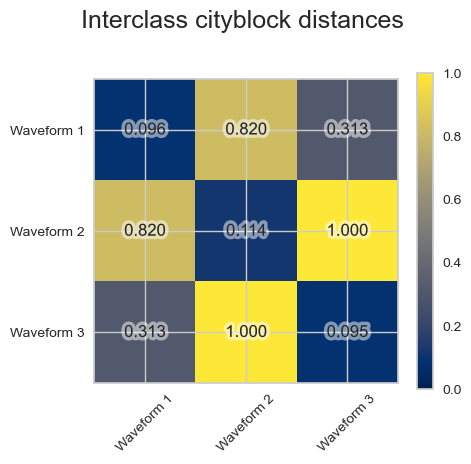

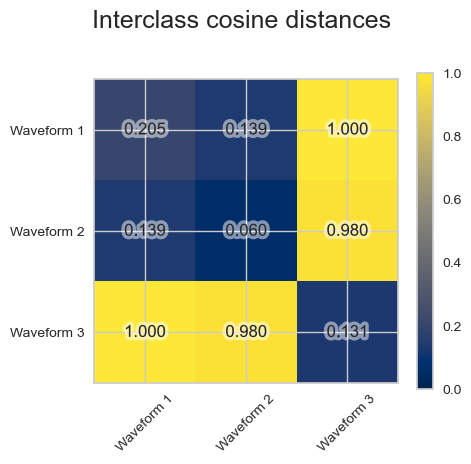

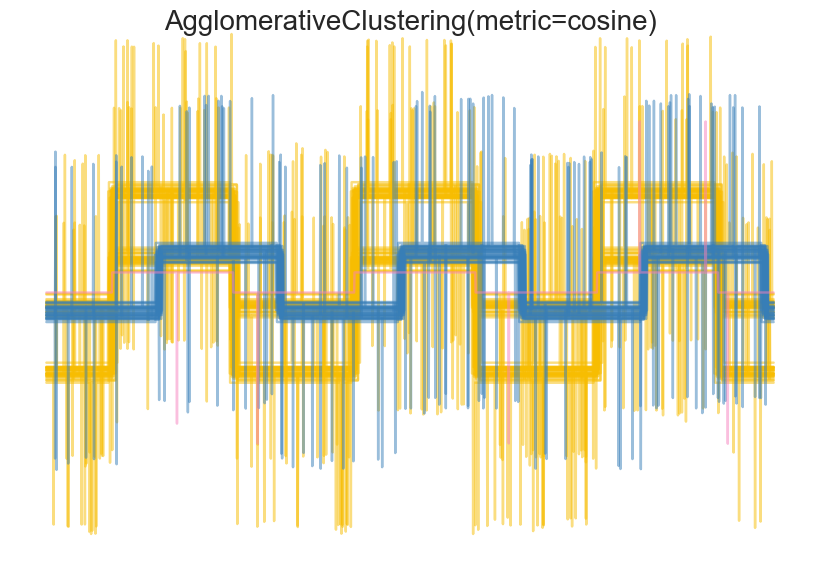

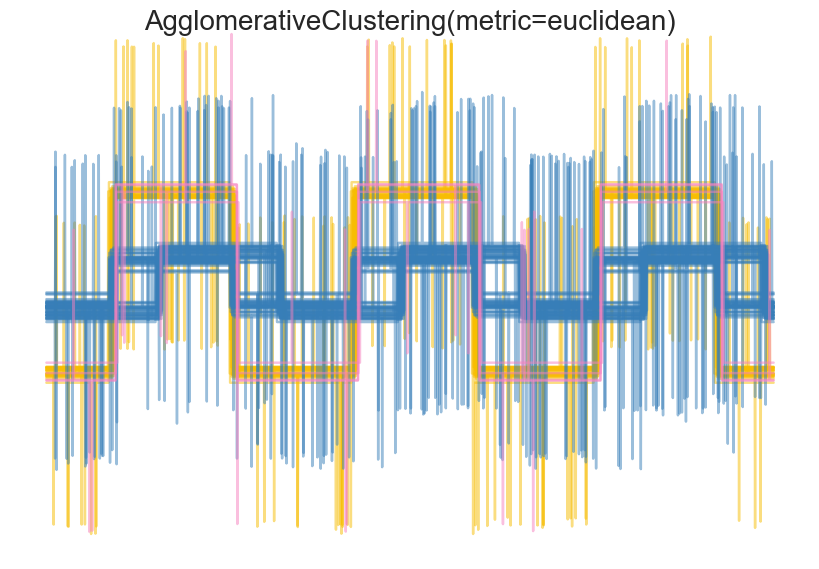

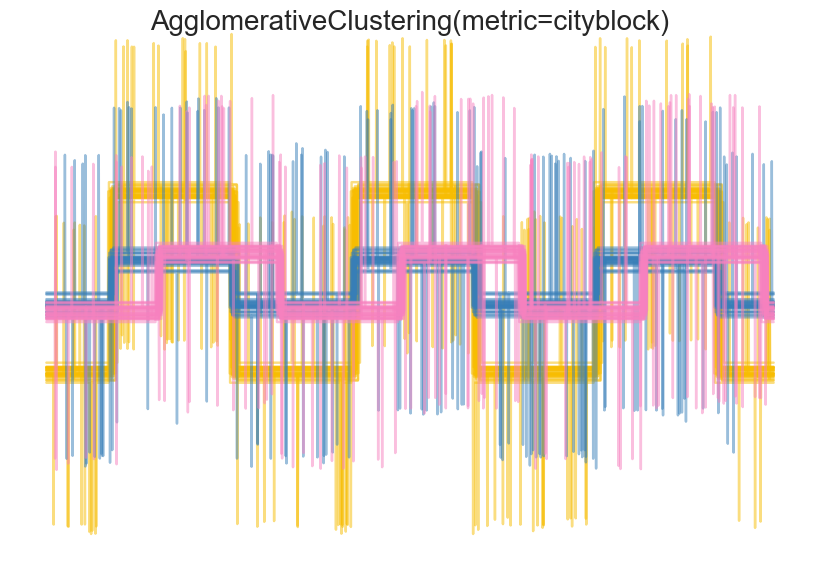

In [7]:
# Author: Gael Varoquaux
# License: BSD 3-Clause or CC-0

import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

np.random.seed(0)

# Generate waveform data
n_features = 2000
t = np.pi * np.linspace(0, 1, n_features)


def sqr(x):
    return np.sign(np.cos(x))


X = list()
y = list()
for i, (phi, a) in enumerate([(0.5, 0.15), (0.5, 0.6), (0.3, 0.2)]):
    for _ in range(30):
        phase_noise = 0.01 * np.random.normal()
        amplitude_noise = 0.04 * np.random.normal()
        additional_noise = 1 - 2 * np.random.rand(n_features)
        # Make the noise sparse
        additional_noise[np.abs(additional_noise) < 0.997] = 0

        X.append(
            12
            * (
                (a + amplitude_noise) * (sqr(6 * (t + phi + phase_noise)))
                + additional_noise
            )
        )
        y.append(i)

X = np.array(X)
y = np.array(y)

n_clusters = 3

labels = ("Waveform 1", "Waveform 2", "Waveform 3")

colors = ["#f7bd01", "#377eb8", "#f781bf"]

# Plot the ground-truth labelling
plt.figure()
plt.axes([0, 0, 1, 1])
for l, color, n in zip(range(n_clusters), colors, labels):
    lines = plt.plot(X[y == l].T, c=color, alpha=0.5)
    lines[0].set_label(n)

plt.legend(loc="best")

plt.axis("tight")
plt.axis("off")
plt.suptitle("Ground truth", size=20, y=1)


# Plot the distances
for index, metric in enumerate(["euclidean", "cityblock", "cosine"]):
    avg_dist = np.zeros((n_clusters, n_clusters))
    plt.figure(figsize=(5, 4.5))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(
                X[y == i], X[y == j], metric=metric
            ).mean()
    avg_dist /= avg_dist.max()
    for i in range(n_clusters):
        for j in range(n_clusters):
            t = plt.text(
                i,
                j,
                "%5.3f" % avg_dist[i, j],
                verticalalignment="center",
                horizontalalignment="center",
            )
            t.set_path_effects(
                [PathEffects.withStroke(linewidth=5, foreground="w", alpha=0.5)]
            )

    plt.imshow(avg_dist, interpolation="nearest", cmap="cividis", vmin=0)
    plt.xticks(range(n_clusters), labels, rotation=45)
    plt.yticks(range(n_clusters), labels)
    plt.colorbar()
    plt.suptitle("Interclass %s distances" % metric, size=18, y=1)
    plt.tight_layout()


# Plot clustering results
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(
        n_clusters=n_clusters, linkage="average", metric=metric
    )
    model.fit(X)
    plt.figure()
    plt.axes([0, 0, 1, 1])
    for l, color in zip(np.arange(model.n_clusters), colors):
        plt.plot(X[model.labels_ == l].T, c=color, alpha=0.5)
    plt.axis("tight")
    plt.axis("off")
    plt.suptitle("AgglomerativeClustering(metric=%s)" % metric, size=20, y=1)


plt.show()

[Find here the complete list of distance metrics available in scikit-learn.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics)

## Standardization for Clustering
It isn't strictly necessary to standardize before clustering, whether it is required or not may depend on the distance metric you choose. For example, **with the Euclidean distance, features with high ranges will have a bigger influence** on the clustering. For standardization you can use scikit-learn [StandardScaler.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

[Scaling is also important with other algorithms such as K-neighbors models and PCA.](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

## Load the Data

### Clustering images - small MNIST

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of $28 \times 28$  handwritten digits that is commonly used for training various image processing systems, and is also widely used for training and testing in the field of machine learning. Scikit-learn provides **a smaller, and low-resolution, version of MNIST** that we can load using the `sklearn.datasets.load_digits` function.

While it is usually used to train supervised classification algorithms, we will use it today for clustering.

In [8]:
from sklearn.datasets import load_digits

digits = load_digits()
# Extracts images and labels
X = digits.images
y = digits.target

print("X.shape ", X.shape)
print("y.shape ", y.shape)


X.shape  (1797, 8, 8)
y.shape  (1797,)


The dataset contains a total of 1797 images, each of them having size $8 \times 8$ (the small MNIST dataset has fewer samples than the original, which has 60k samples, and smaller images). Let's visualize some of them:

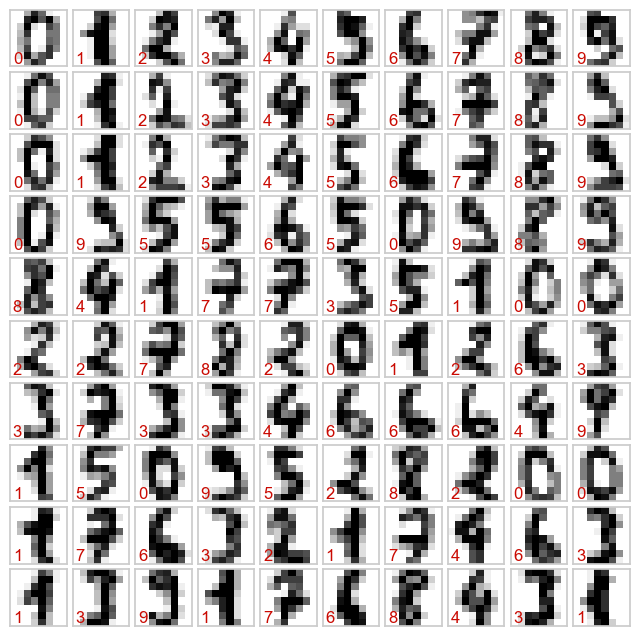

In [9]:
# Creates a figure composed of 10 rows ans 10 columns, each subfigure
# of size 8x8. subplot_kw={...} disables the x and y values which are
# usually plot below each axis
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# For each subfigure (from 0 to 100 in the 10x10 matrix)
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i], cmap='binary', interpolation='nearest')
    # Write the label in the bottom-left corner of the figure
    ax.text(0.05, 0.05, str(y[i]),
            transform=ax.transAxes, color='r')

### Data Visualization - Dimensionality reduction

Let's pretend we don't know nothing abount MNIST and let's cosider each image as a vector of $8 \times 8=64$ features. We can try to have a first idea on how samples are organized by visualizing how they are distributed in the space. In order to do that (we can only visualize 3 dimensions!) we have to reduce the number of features! There are a lot of dimensionality reduction algorithms, in this case we will use **PCA**.

We can use PCA to convert the original dataset features (64) into **3 new features** (NB: not a subset of the most important features, but new ones!) and use them as coordinates of a 3D space!

In [10]:
from sklearn.decomposition import PCA
# Define PCA with 3 components, this will transform 
pca = PCA(n_components=3)

# We consire images as simple vectors of 64 features
X = X.reshape(-1, 8*8)
# Reduce features dimensionality, just for visualization
# purpuses
X_prj = pca.fit_transform(X)
X_prj.shape

(1797, 3)

In [11]:
fig = px.scatter_3d(x=X_prj[:,0], y=X_prj[:,1], z=X_prj[:,2], color=y)
fig.update_traces(marker_size = 4)
fig.show()

By inspecting the graph we can see that:
- Images (in this case points in the 3D space) of the **same class seem to aggregate in close regions** of the space
- Different classes/cluster seem to be well separated, but may have different densities and shapes
- **Similar classes (e.g., 3 and 8)** tend to be located in **close regions** of the space

These observations (the first two) let us conclude that
- A good clustering algorithm, properly tuned, should be able to accurately reconstruct the original clusters
- From the third observation, moreover, we can predict that similar digits may end up being clustered within the same cluster

**Notice** indeed that in this lecture we will deal with **unsupervised algorithms**, that don't have access to the true underlying class of each digit. Their prediction is only driven by how images are similar/dissimilar to each other! We may end up selecting fewer or more clusters, but this does not mean that the clustering is wrong!

## Agglomerative (or Hierarchical) Clustering

Agglomerative clustering (or Hierarchical clustering) is a clustering technique that works by partitioning the points iteratively. A **bottom-up** approach starts by considering singleton clusters (i.e., clusters containing only one sample) and then **iteratively merges together the two most similar clusters**.

This iterative approach, while in some cases less efficient, allows us to reconstruct the sequence of merges and to build a hierarchy of clusters which is usually called **dendrogram**.

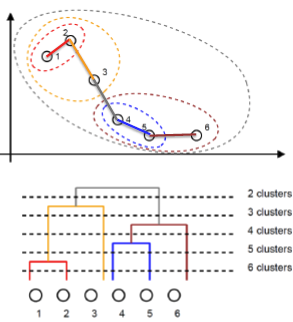

### How to perform Agglomerative Clustering in practice?

We have two ways to perform hierarchical clustering:
- by building the **Linakge Matrix**, i.e., a matrix specifying the sequence of merges, through the **SciPy** library
- or by using the usual **scikit-learn** `AgglomerativeClustering` class and the usual `fit()` and `predict()` methods

### Linkage Matrix with SciPy

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(X, metric='euclidean', method='ward')

The linkage matrix is a $(N-1) \times 4$ matrix specifying the sequence of merges, from the first one (first row) to the last one (last row).

Each row contains **four information**:
- `id1`, `id2` are the id of the two samples, or clusters, that have been merged at that particular iteration
- `dist` is the distance between `id1`, `id2` before the merge
- `npoints` is the number of observations contained in the cluster after the merge

The `id#` values refer to:
- original points if the value is `id# < len(data)`, 
- or to a cluster otherwise. We can reconstruct the cluster by selecting the linkage row `id# - len(data)`.

In [13]:
print("X.shape", X.shape)
# Print the first 10 merges
Z[:10]

X.shape (1797, 64)


array([[1585.        , 1648.        ,    5.29150262,    2.        ],
       [1247.        , 1250.        ,    7.54983444,    2.        ],
       [ 777.        , 1237.        ,    7.93725393,    2.        ],
       [1076.        , 1134.        ,    8.06225775,    2.        ],
       [1471.        , 1485.        ,    8.18535277,    2.        ],
       [1213.        , 1329.        ,    8.60232527,    2.        ],
       [1463.        , 1464.        ,    9.2736185 ,    2.        ],
       [1472.        , 1531.        ,    9.32737905,    2.        ],
       [ 522.        ,  611.        ,    9.43398113,    2.        ],
       [1458.        , 1509.        ,    9.69535971,    2.        ]])

For instance, if we look at line $0$, we are inspecting the first merge that is being performed by the algorithm. This is referring to sample id $1585$ and $1648$, which are the two most similar points in the dataset.

In [19]:
# Compute the linkages row numbers referring 
# to a merge with at least one cluster
np.where(np.any(Z[:,:2] > 1797, axis=1))[0].tolist()

[58,
 60,
 68,
 70,
 73,
 81,
 101,
 109,
 115,
 116,
 132,
 141,
 148,
 162,
 165,
 166,
 172,
 180,
 181,
 185,
 196,
 201,
 205,
 208,
 217,
 234,
 243,
 247,
 249,
 254,
 260,
 269,
 274,
 291,
 302,
 303,
 311,
 317,
 321,
 322,
 323,
 324,
 327,
 329,
 338,
 340,
 341,
 343,
 345,
 346,
 347,
 351,
 352,
 353,
 356,
 373,
 376,
 377,
 380,
 381,
 382,
 388,
 390,
 391,
 395,
 397,
 398,
 399,
 402,
 403,
 404,
 407,
 409,
 412,
 413,
 415,
 421,
 422,
 424,
 429,
 435,
 438,
 439,
 440,
 443,
 444,
 445,
 447,
 461,
 466,
 472,
 481,
 483,
 491,
 493,
 496,
 497,
 498,
 500,
 501,
 502,
 509,
 513,
 518,
 520,
 521,
 522,
 523,
 528,
 530,
 532,
 533,
 537,
 539,
 543,
 547,
 553,
 554,
 556,
 560,
 561,
 563,
 564,
 567,
 570,
 571,
 572,
 574,
 575,
 577,
 582,
 583,
 585,
 586,
 593,
 598,
 599,
 606,
 609,
 611,
 612,
 614,
 616,
 617,
 620,
 621,
 625,
 626,
 627,
 629,
 632,
 634,
 635,
 639,
 640,
 650,
 651,
 652,
 653,
 654,
 656,
 657,
 658,
 663,
 668,
 671,
 672,
 674

In [20]:
# Inspect one of these lines to verify 
print(Z[58])
print(Z[3])

[ 326.         1800.           11.44552314    3.        ]
[1076.         1134.            8.06225775    2.        ]


Line with index $58$ instead merges id $326$ (a sample, $< 1797$) with $1800$ (a previous cluster, $>= 1797$). If we want to reconstruct which was cluster $1800$ we can inspect line with index $1800 - 1797 = 3$ 

### Plotting the Dendrogram

Starting from the linkage matrix, we can **plot with SciPy the dendrogram** using the `scipy.cluster.hierarchy.dendrogram` method. 

In the following function we plot the dendrogram and **add some additional information on the dendrogram intersections**. In particular we mark intersection with their linkage row id, so that we can optionally inspect which nodes are under that part of the dendrogram!

**NOTE:** we chose to identify nodes by negative numbers: $-1$ is the last merge, $-2$ is the last but one merge and so on.

In [21]:
Z[-10]

array([3560.        , 3570.        ,  256.68059156,  181.        ])

(<Figure size 2000x1000 with 1 Axes>, <Axes: >)

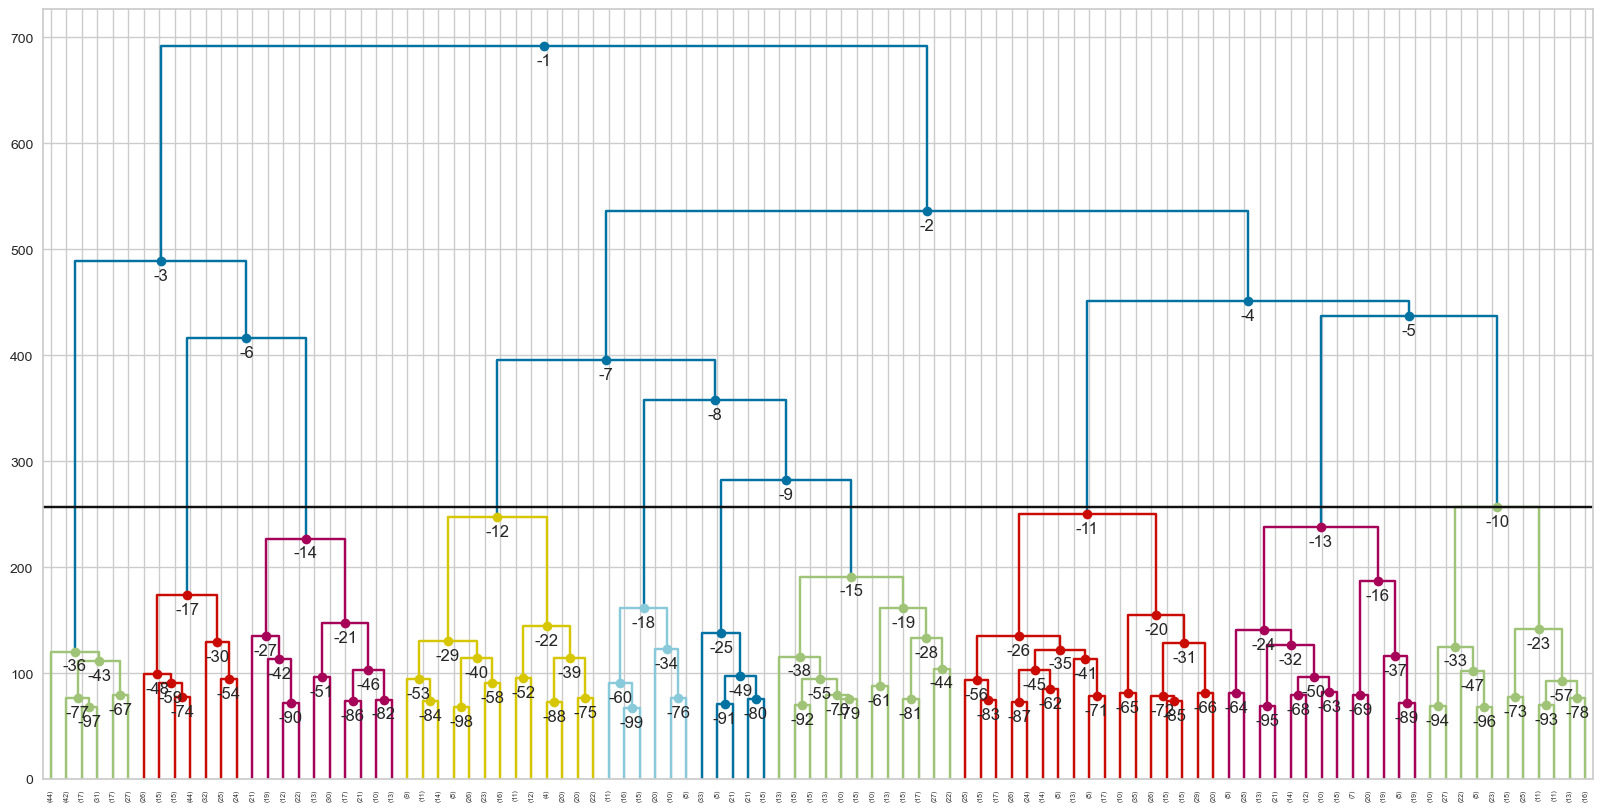

In [22]:
from functions.dendrogram_util import plot_dendrogram, plot_node # custom functions that are wrappers of SciPy functions

# Plot the dendrogram, showing ony the ast 100 merges
# and cutting the dendrogram so that we obtain 10 clusters
plot_dendrogram(Z=Z, X=X, truncate_mode='lastp', 
                              p=100, n_clusters=10)

While the dendrogram is very useful for inspecting the hierarchy and sequence of merges/splits, **it is not very informative if we are not able to determine what are the samples grouped inside each of the clusters**.

However, **using the linkage matrix we can reconstruct the set of points within each cluster!** Remember that the first two values in each row refer to sample/cluster id. We can "backtrack" the sequence of merges and reconstruct the list of samples given a linkage row!

            1
Frequency:  2
Images in the cluster: 2 / 1797


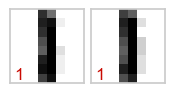

In [23]:
# Plot the first node
# Remember: we expect only two samples,
# the most similar ones in the dataset!
plot_node(Z, X, y, 0)

As expected, if we inspect the node with id $0$ (first merge), we obtain ony two sample which look almost identical. They are the two most similar samples in the dataset!

We now plot nodes $-14$ and $-17$, which are later merged together! They refer to samples with classes $4$ and $6$, which are visually similar to each other!

              4
Frequency:  178
Images in the cluster: 178 / 1797
            5    6
Frequency:  1  180
Images in the cluster: 181 / 1797


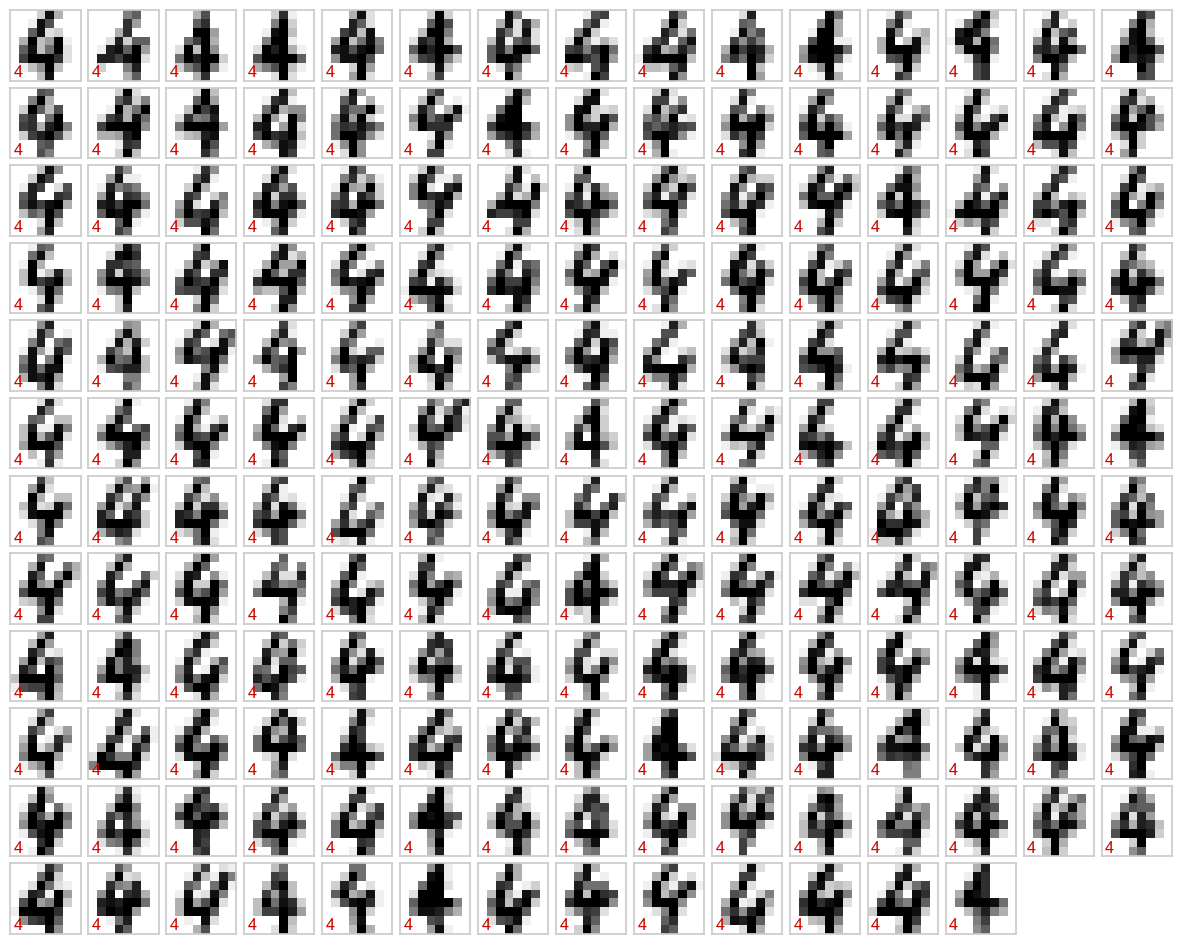

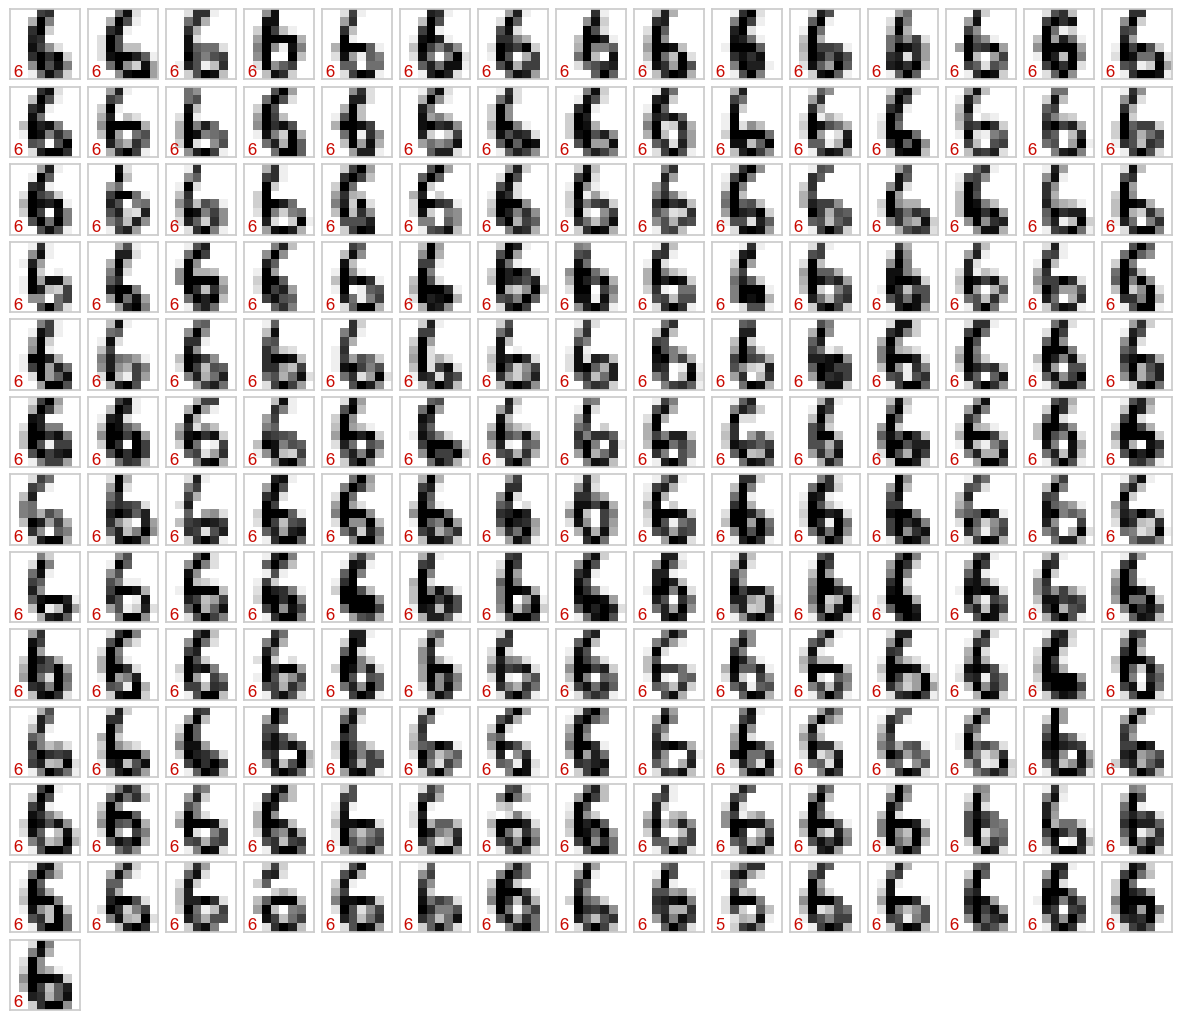

In [24]:
plot_node(Z, X, y, -14)
plot_node(Z, X, y, -17)

Notice that the cluster of $4$, is the resut of merging two subclusters: $-27$ and $-21$. If we inspect them, we see that these correspond to two different ways of writing the four:

             4
Frequency:  74
Images in the cluster: 74 / 1797
              4
Frequency:  104
Images in the cluster: 104 / 1797


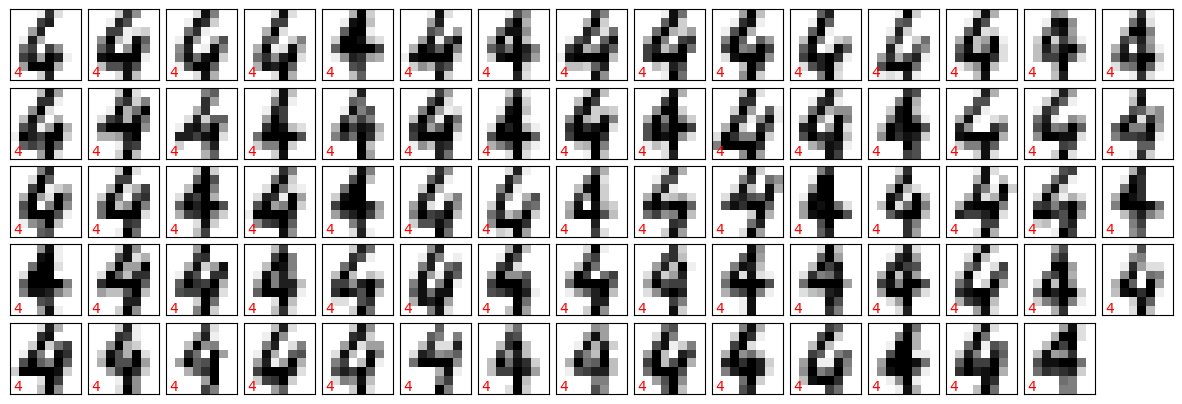

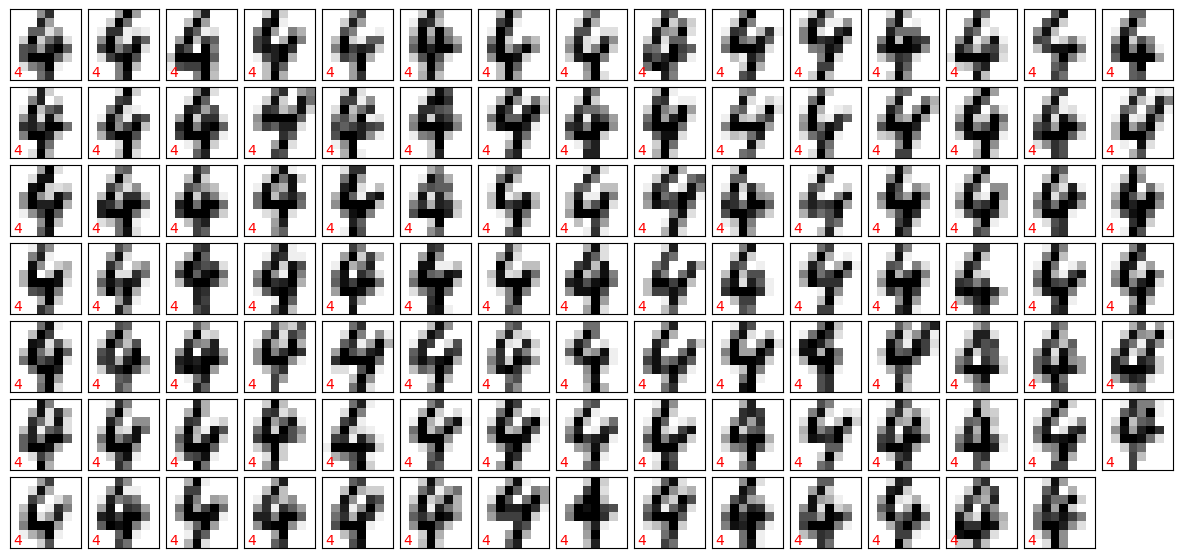

In [19]:
plot_node(Z, X, y, -27)
plot_node(Z, X, y, -21)

The first represent (almost) "closed" $4$ digits, while the second one "U shaped" $4$s! 

Hierarchical clustering allows us to identify these structure in data! Because of that it is also **often used as a visualization technique to inspect datasets**.

### Linkage methods

Given a set of clusters, we have different options to decide which of them to merge first. There are mutiple strategies to decide, the best one ofted depend on the dataset!

- **Complete** (maximal intercluster distance): Compute all distances between points in cluster A and cluster B and return the *largest of these distances*.
- **Single** (minimal intercluster distance): As before, but we return the *smallest distance*.
- **Average/Median** (mean intercluster distance): As before, but we return the *average/median of the distances*.
- **Centroid**: We compute the distance of the two clusters as the distance between the two clusters means/centroids.
- **Ward** (minimal inter-cluster variance): Finds the pair of clusters that leads to *minimum increase in total within-cluster variance after merging*

<img src="images/hac_linkage_methods.PNG" alt="tree_adj" width="70%"/>

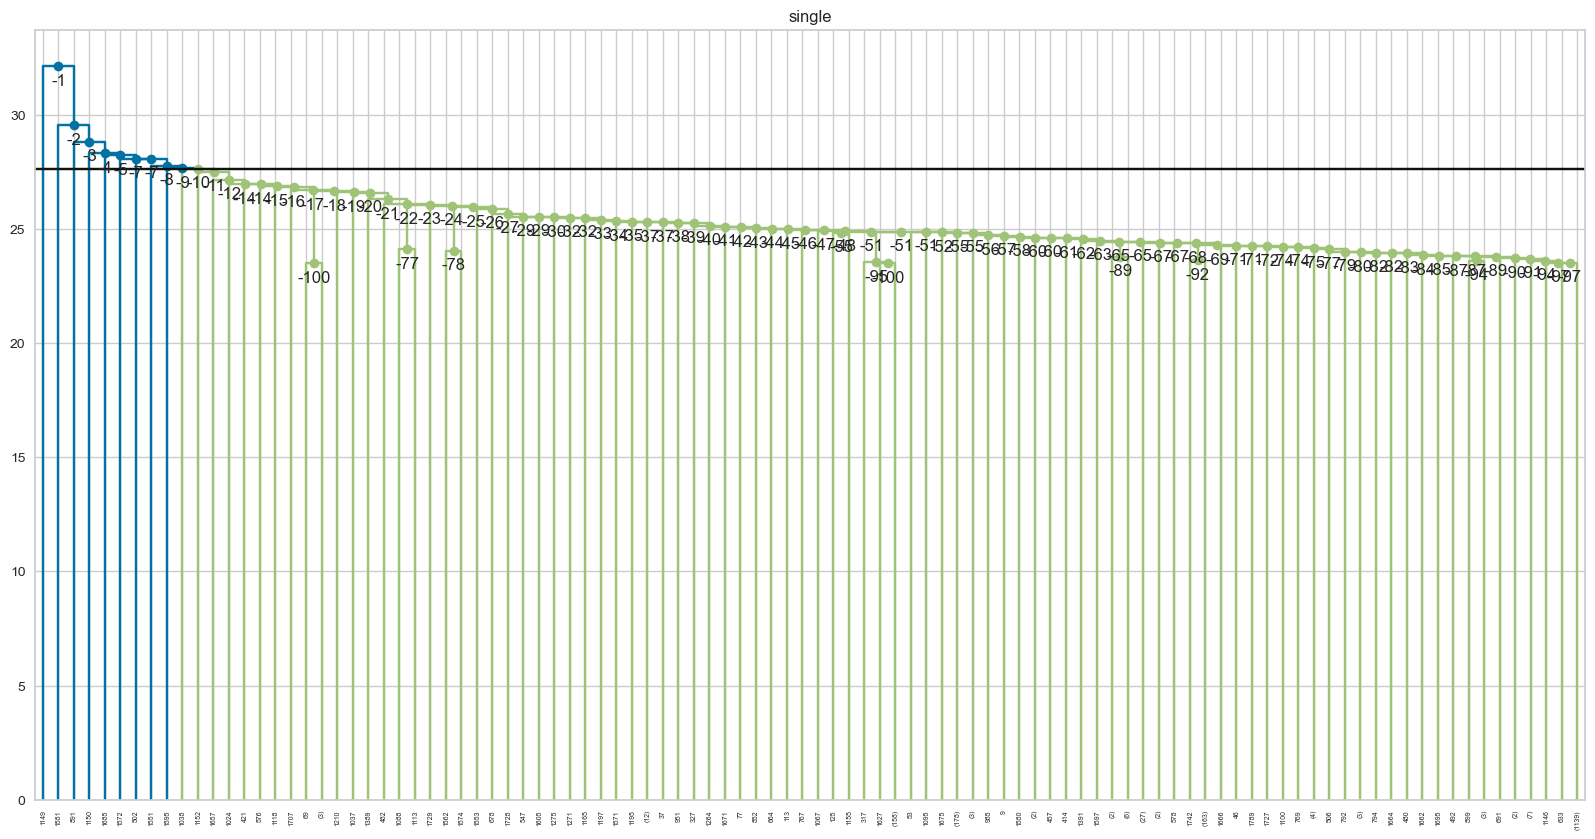

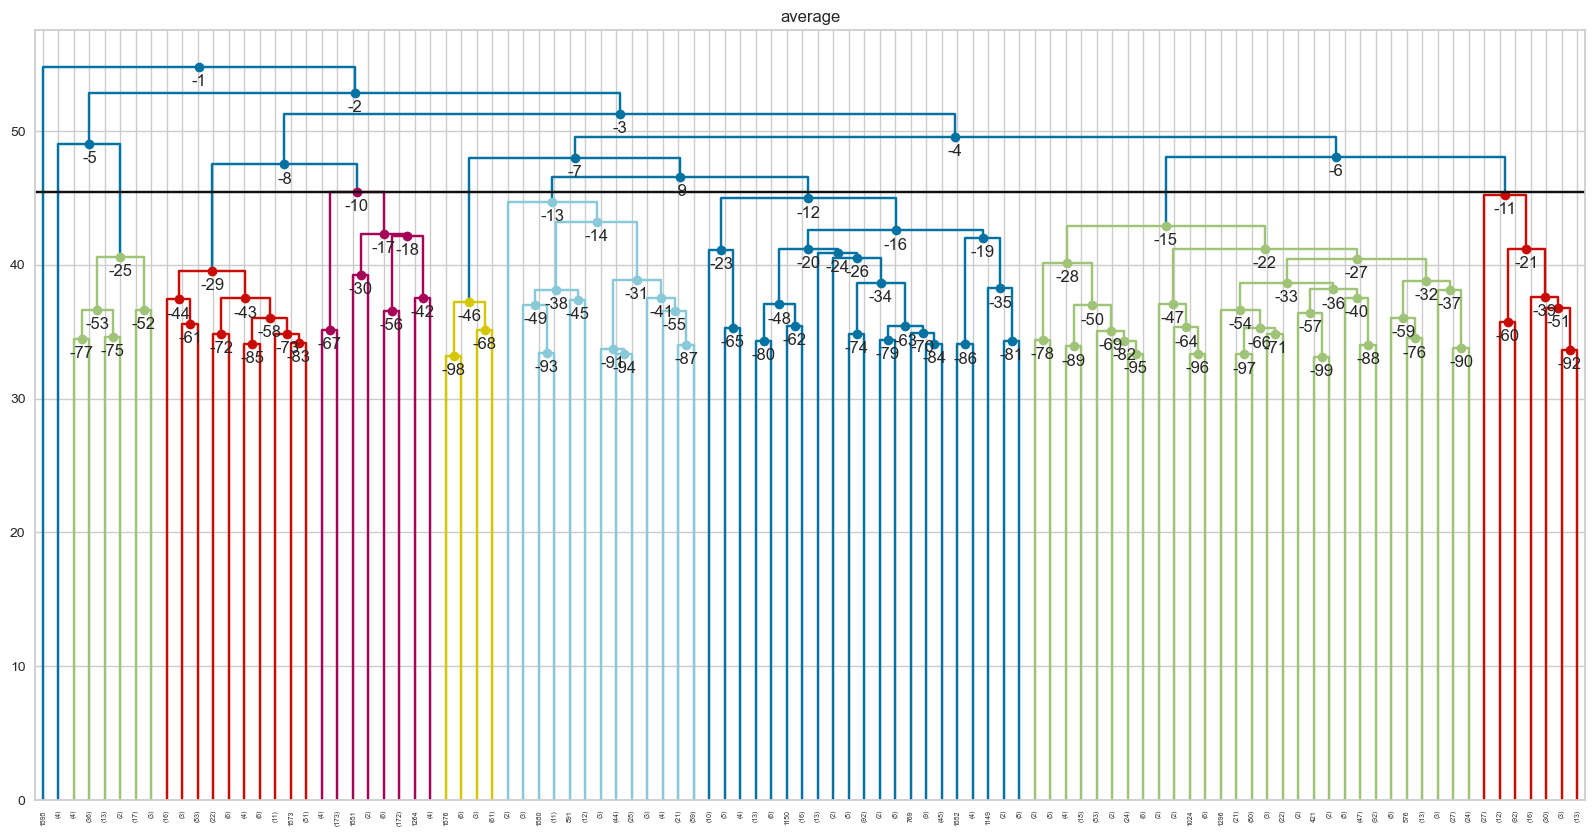

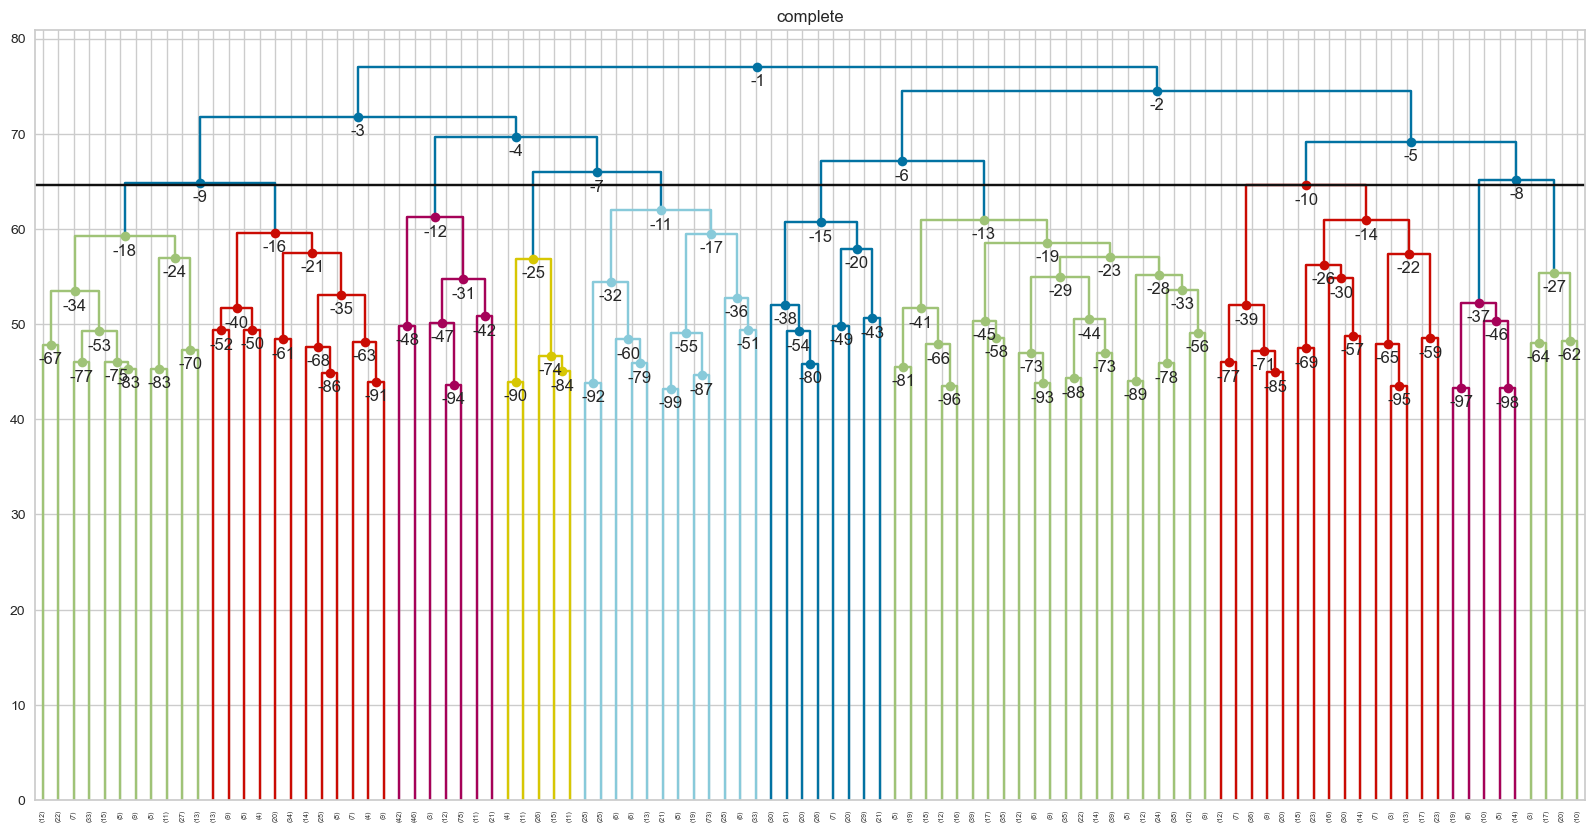

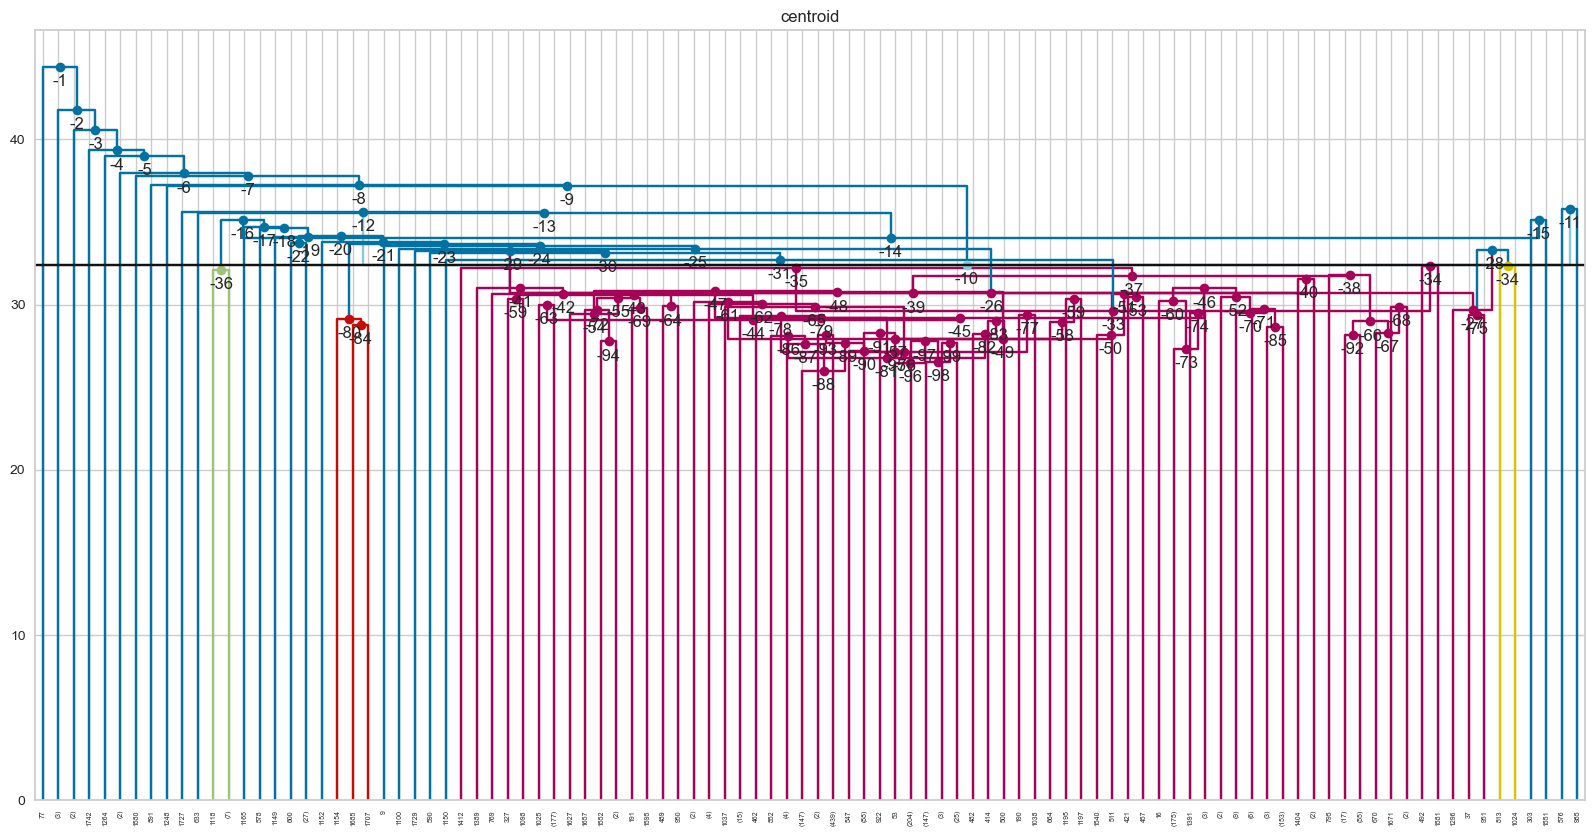

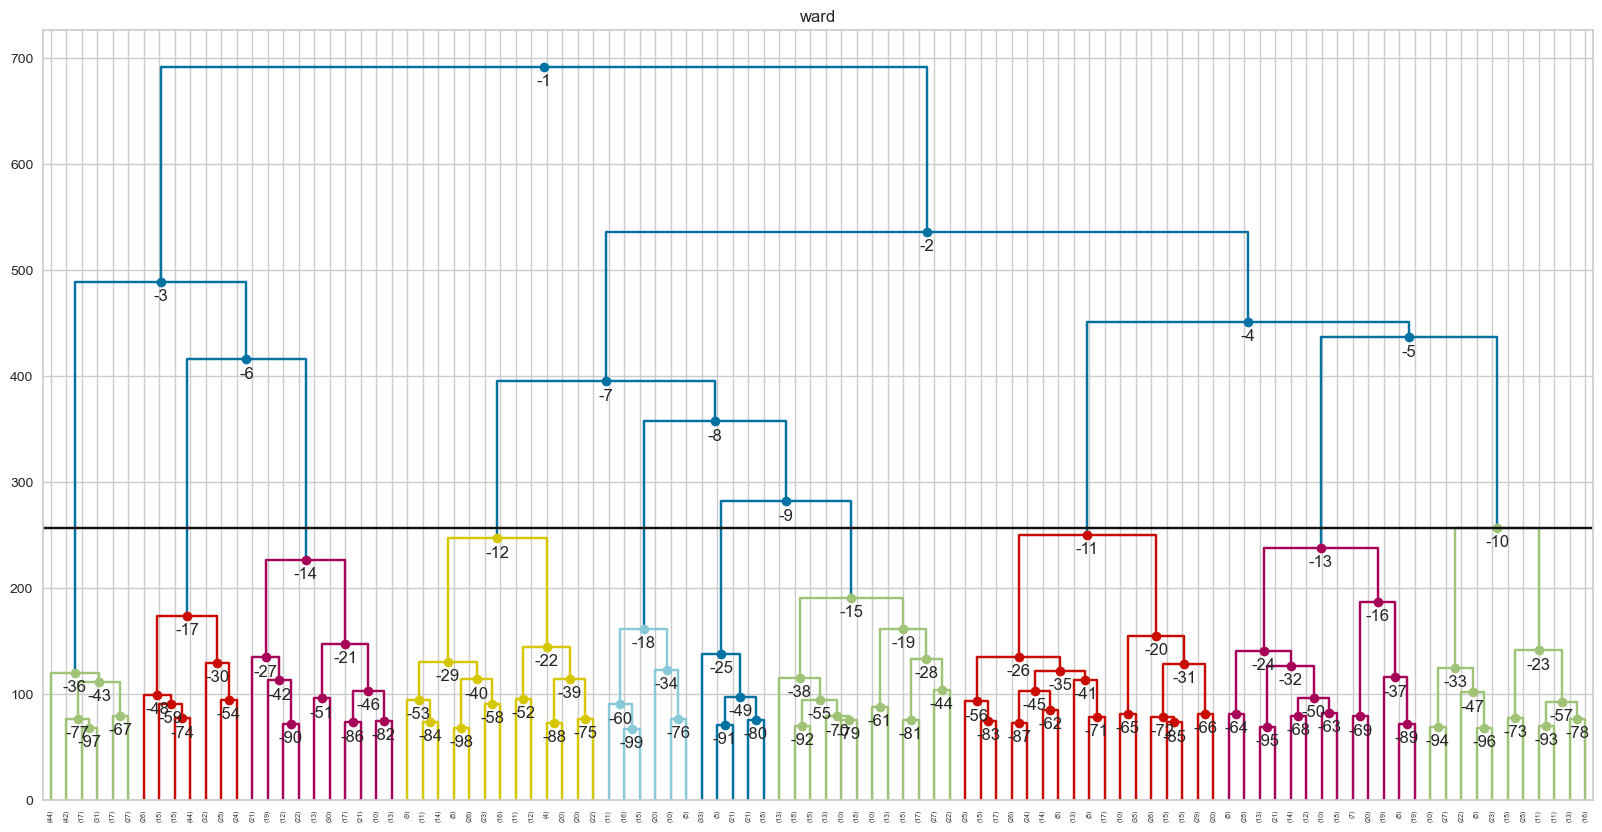

In [25]:
methods = ['single', 'average', 'complete', 'centroid', 'ward']

for method in methods:
    Z = linkage(X, metric='euclidean', method=method)
    fig, ax = plot_dendrogram(Z=Z, X=X, truncate_mode='lastp', 
                              p=100, n_clusters=10)
    ax.set_title(method)

As expected:
- **Single** linkage is the one that provides smaller jumps among all. Not very good in our case where points are all very close to each other. It ends up merging single points into an (each time) larger cluster until coverage
- **Complete** linkage provides generally larger jumps than single and average
- **Centroids** linkage may suffer (as in this case!) of **inversions**. As the centroids move with new observations (after merging), it is possible that the distance between the new cluster and another cluster decreases after the merge. If these two happen to be the next two clusters to be merged, we may see a "jump" downwards in the dendrogram
- **Ward** is generally very stable (default choice for scikit-learn)

### The scikit-learn `AgglomerativeClustering` class

We can also make use of the standard scikit-learn library.

We can either:
- specify a cut point using the `distance_threshold` method
- or the total number of clusters with the parameter `n_clusters`. The cut point will be automatically determined. *How to determine it using the linkage matrix?*

(<Figure size 2000x1000 with 1 Axes>, <Axes: >)

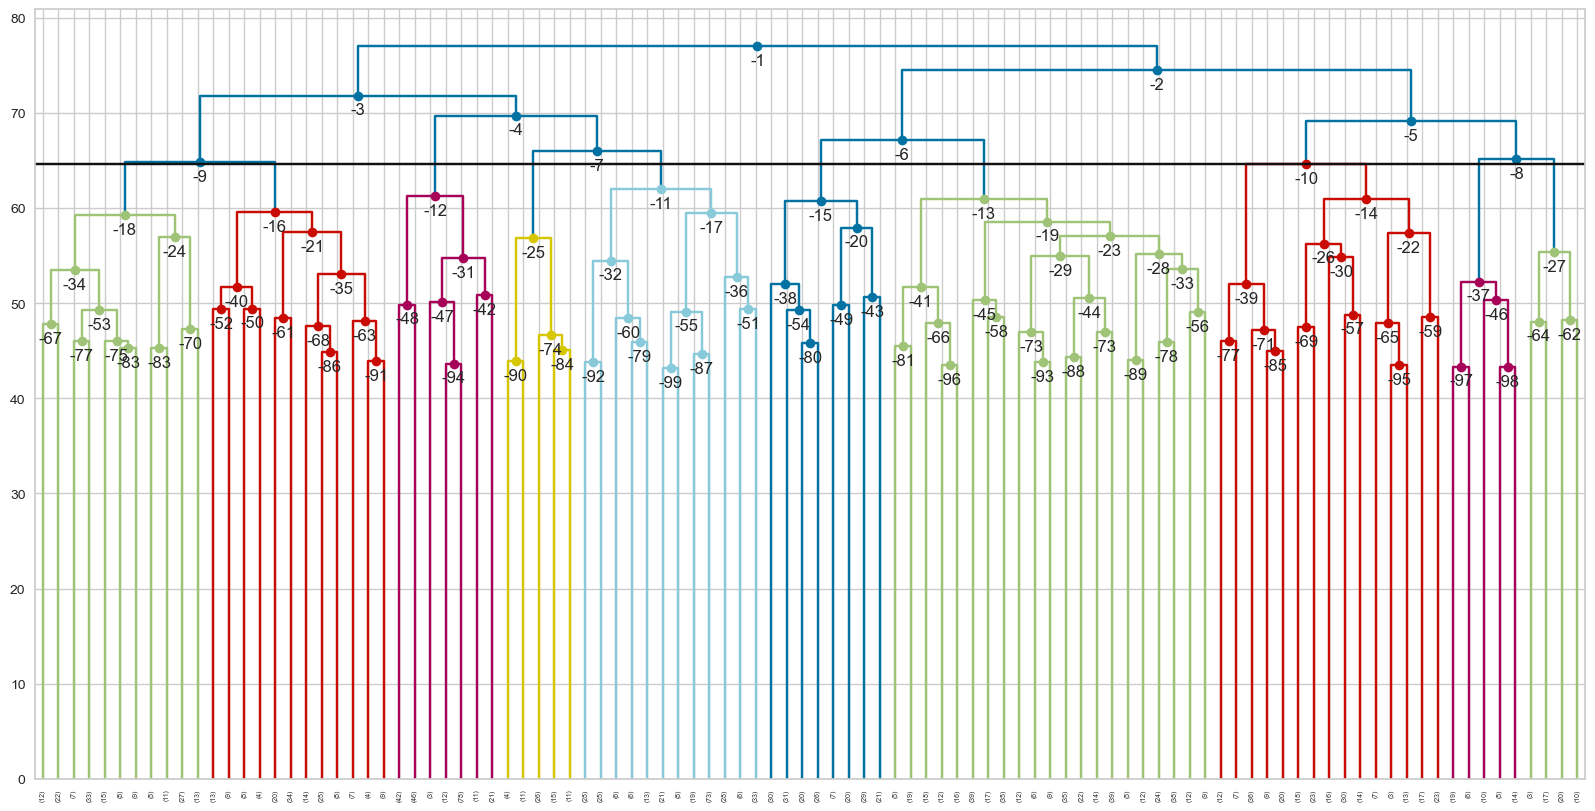

In [26]:
from sklearn.cluster import AgglomerativeClustering
distance_threshold=None # 64.7
n_clusters=10 # None

aggl_model = AgglomerativeClustering(n_clusters=n_clusters, 
                                distance_threshold=distance_threshold, 
                                metric='euclidean', linkage='complete')

y_predict = aggl_model.fit_predict(X)

fig = px.scatter_3d(x=X_prj[:,0], y=X_prj[:,1], z=X_prj[:,2], color=y_predict)
fig.update_traces(marker_size = 4)
fig.show()
plot_dendrogram(model=aggl_model, X=X, truncate_mode='lastp', p=100,
                n_clusters=n_clusters, 
                color_threshold=distance_threshold)

 ### Key Points 🔑
 - **It's expensive**: $O(n^3)$ time complexity and $O(n^2)$ space complexity (it requires storing pairwise distances between all data points) -> **may not be practical for very large datasets**
     - In each iteration, the algorithm needs to update the proximity matrix, which can involve $O(n^2)$ operations
     - There are $n−1$ iterations to merge all clusters, resulting in $O(n^3)$ operations in the worst case.
 - **Many choices for linkage criteria** -> capable of identifying complex cluster shapes
 - Every node gets clustered (no child left behind)

## K-Means Clustering

KMeans is a representative-based clustering algorithm, meaning that, each cluster is always represented by a single point in the feature space. It is an **iterative** algorithm that incrementally updates and improve the solution, and it **needs to know in advantage the final number of clusters**.

**Pseudocode:**
```
1. Choose the number of clusters K.
2. Initialize K centroids.
3. Repeat until convergence:
   a. Assign each data point to the nearest centroid.
   b. Update the centroids based on the mean of the assigned data points.
4. Output the final clusters.
```

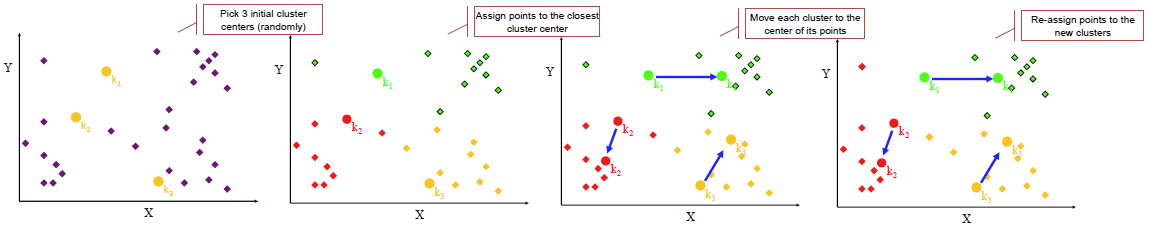

### scikit-learn code

In [27]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=10, init='random', n_init=10, random_state=0)             
y_predict = kmeans_model.fit_predict(X)

fig = px.scatter_3d(x=X_prj[:,0], y=X_prj[:,1], z=X_prj[:,2], color=y_predict)
fig.update_traces(marker_size = 4)
fig.show()

That's it! Just 1 line of code!

Now that we've run k-Means, we can look at various attributes of our clusters. Full documenation is [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [28]:
display(kmeans_model.cluster_centers_)
display(kmeans_model.labels_[0:10])

array([[ 0.00000000e+00,  5.85635359e-01,  8.60220994e+00,
         1.44861878e+01,  1.40331492e+01,  7.03314917e+00,
         6.02209945e-01, -5.55111512e-17,  1.10497238e-02,
         4.15469613e+00,  1.26574586e+01,  9.14917127e+00,
         1.11602210e+01,  1.20055249e+01,  1.92817680e+00,
         1.10497238e-02,  5.52486188e-03,  1.97237569e+00,
         3.72375691e+00,  3.50828729e+00,  1.16795580e+01,
         9.90055249e+00,  8.83977901e-01,  9.71445147e-17,
        -1.30104261e-18,  9.94475138e-02,  9.83425414e-01,
         8.16022099e+00,  1.38453039e+01,  6.73480663e+00,
         3.03867403e-01, -2.60208521e-18,  0.00000000e+00,
         6.07734807e-02,  6.62983425e-01,  4.55801105e+00,
         1.18121547e+01,  1.21381215e+01,  2.26519337e+00,
         0.00000000e+00, -1.04083409e-17,  4.41988950e-01,
         1.41436464e+00,  6.85082873e-01,  4.21546961e+00,
         1.23756906e+01,  6.25414365e+00,  5.52486188e-03,
        -4.33680869e-18,  9.00552486e-01,  7.34806630e+0

array([7, 6, 6, 0, 2, 8, 4, 9, 6, 8])

### Initialization

Moreover, K-Means **performance greatly depends on the initial points**. If we start wit a cluster point which is far away from the actual points, and close to an outlier, we may end up obtaining a cluster with a single point inisde!

Multiple strategies exists:
- **random**: choose K points at random from data for the initial centroids
- running **hierchical clustering** on a smaller set of points, searching for K cluster, and then initializing K-Means as the centroids identified by hierarchical clustering
- **farthest** initialization: picking K points which are as far as possible for each other (start with a random point, the select the furthest one, the the furthest from the two selected points, and so on)
- **kmeans++**: similar to farthest initialization, but each time we compute the minimum distance $D(x)$ between a point x and one of the selected centroids. Then we randomly select the next one with probability inversally proportional to $D(x)^2$. In other words, we sample points far away with higher probability w.r.t. those close to already selected points

### Key Points 🔑
- The K-Means algorithm aims to **minimize the within-cluster sum of squared distances**, making the clusters compact.
- K-Means is influenced by the scale of features since it uses the Euclidean distance. **Remember to standardize**. 
- The algorithm's performance can be sensitive to the initial selection of centroids. **Multiple runs with different initializations are common**, and the result with the lowest within-cluster sum of squared distances is often chosen. Use the `n_init` parameter in scikit-learn K-Means model.
- K-Means assumes that clusters are spherical and equally sized, making it **less suitable for irregularly shaped clusters or clusters with varying sizes**. It also struggle with different densities and outliers than do not belong to any cluster. 
- There's no notion of 'not part of any cluster'.

## DBSCAN

DBSCAN is a very powerful algorithm for clustering based on the concept of density and connectivity. It has three major advantages wrt to the previous two algorithms:
- it doesn't need to know the number of clusters in advantage
- it can cluster arbitrary shapes
- it is able to identify and handle outliers

Given `eps` and `MinPts`, we define:
- **core point**: a point having at least `MinPts` points inside a radius of size `eps`. Can be retrieved with `model.core_sample_indices_`
- **border point**: a point having fewer than `MinPts` in  `eps`, but it is inside the neighborhood of a core point
- **noise point**: a point that is neither a core point nor a border point. Clustered with cluster id `-1`

The algorithm starts with a random point p and retrieves all the points which are **density reachable** from p. If p is a core point the cluster is kept and the algorithm moves to the next unvisited point until all points have bees visited.

<img src="images/dbscan.png" alt="dbscan" width="80%"/>

### scikit-learn code

In [43]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=24, min_samples=20)
y_predict = dbscan_model.fit_predict(X)

print("Number of outliers", (y_predict == -1).sum())
ids, counts = np.unique(y_predict, return_counts=True)
print(pd.DataFrame(counts.reshape(1,-1), columns=ids, index=['']))

fig = px.scatter_3d(x=X_prj[:,0], y=X_prj[:,1], z=X_prj[:,2], color=y_predict)
fig.update_traces(marker_size = 4)
fig.show()

Number of outliers 467
   -1    0    1    2   3    4    5    6    7    8
  467  177  268  177  43  144  141  125  122  133


### How to find the optimal values for `eps` and `min_samples`?
Instead of just empirically observing how the epsilon value affects the clustering (which would be very costly for large, high-dimensional data), we can also inspect how far each data point is to its $N^{th}$ closest neighbor. We expect that core points and border points’ k-distance are within a certain range, while noise points have much greater k-distance, thus we can observe a knee point in the k-distance plot. 

In [29]:
from sklearn.neighbors import NearestNeighbors

# x-axis is each individual data point, numbered by an artificial index
# y-axis is the distance to its 2nd closest neighbor
def plot_epsilon(df, min_samples):
    fitted_neigbors = NearestNeighbors(n_neighbors=min_samples).fit(df)
    distances, indices = fitted_neigbors.kneighbors(df)
    dist_to_nth_nearest_neighbor = distances[:,-1]
    plt.plot(np.sort(dist_to_nth_nearest_neighbor))
    plt.xlabel("Index\n(sorted by increasing distances)")
    plt.ylabel("{}-NN Distance (epsilon)".format(min_samples-1))
    plt.tick_params(right=True, labelright=True)

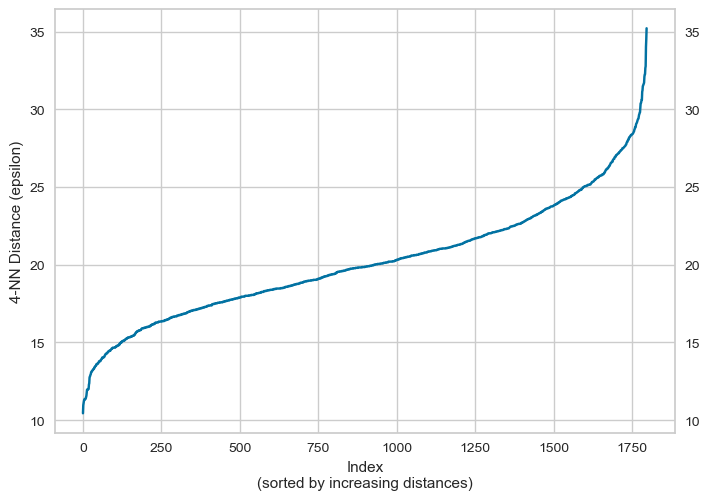

In [30]:
plot_epsilon(X, 5)

Alternatively, it is possible to perform an hyperparameter search with Silhouette Score or other evaluation metrics:

In [33]:
min_samples = range(5,24)
eps = range(15,30,1)

output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X).labels_
        score = silhouette_score(X, labels)
        output.append((ms, ep, score))

In [34]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.14404134923196563
min_samples: 20
eps: 24


### Key Points 🔑
 - Can cluster non-linear relationships very well; potential for more natural, arbritrarily shaped groupings
 - Does not require specifying the # of clusters (i.e., **k**); the algorithm determines such
 - Robust to outliers
 - Doesn't guarantee that every (or ANY) item will be clustered
 
<br>

## Evaluation Metrics for Clustering

Evaluation metrics in clustering serve the purpose of comparing the clustering results of different algorithms or parameter settings.

### Inertia (or Within-Cluster Sum of Squares)
Inertia measures the **total squared distance from points to their cluster's centroid**. Lower inertia values indicate more compact clusters. The formula is:
$$ \text{Inertia} = \sum_{i=1}^k \sum_{j=1}^{n_i} \left\| x_{ij} - \text{cent}_i \right\|^2 $$
Where $k$ is the number of clusters, $n_i$ is the number of points in cluster $i$, $x_{ij}$ is the $j$-th point in cluster $i$, and $\text{cent}_i$ is the centroid of cluster $i$.

In scikit-learn you can access the inertia attribute of a K-Means model:

In [28]:
kmeans_model.inertia_

1165461.2695883992

### Silhouette Score

Let's say we have a data point $i$, and the cluster it belongs to is referred to as $C(i)$. One way to measure the quality of a cluster $C(i)$ is to measure how close its data points are to each other (within-cluster) compared to nearby, other clusters $C(j)$. This is what `Silhouette Scores` provide for us. **The range is [-1,1]**; a higher silhouette score indicates better-defined clusters; 0 indicates a point on the decision boundary (equal average closeness to points intra-cluster and out-of-cluster), and negative values mean that datum might be better in a different cluster. 

Specifically, $a(i)$ is the average distance from the $i$-th point to the other points in the same cluster:

<center>
<img src="images/silhouette_intra.png">
</center>

Similarly, $b(i)$ is the smallest average distance from the $i$-th point to points in a different cluster:

<center>
<img src="images/silhouette_outer.png">
</center>

Hopefully our data point $i$ is much closer, on average, to points within its own cluster (i.e., $a(i)$ is smaller than $b(i)$). The silhouette score quantifies this as $s(i)$:

<center>
<img src="images/silhouette_eq.png">
</center>
 
**The mean s(i) over all points of a cluster is a measure of how tightly grouped all the points in the cluster are. Thus the mean s(i) over all data of the entire dataset is a measure of how appropriately the entire dataset has been clustered.**
**NOTE:** If data point $i$ it's the only point in the cluster, then the silhouette score is set to 0 (otherwise, $a(i)$ would be undefined).

The `silhouette_score()` function is available in `sklearn`:

In [44]:
print(f"Silhouette score for Agglomerative Clustering: {silhouette_score(X, aggl_model.labels_)}")

Silhouette score for Agglomerative Clustering: 0.1192708999859292


In [45]:
print(f"Silhouette score for K-Means Clustering: {silhouette_score(X, kmeans_model.labels_)}")

Silhouette score for K-Means Clustering: 0.18189172660646816


In [46]:
print(f"Silhouette score for DBSCAN Clustering: {silhouette_score(X, dbscan_model.labels_)}")

Silhouette score for DBSCAN Clustering: 0.14404134923196563


### Visualizing all Silhoutte scores for a particular clustering

We now use the **Silhouette Visualizer from Yellowbrick** to display the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not.

You may also be interested in reading more on the Silhouette analysis here: [Selecting the number of clusters with silhouette analysis on KMeans clustering.](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#)

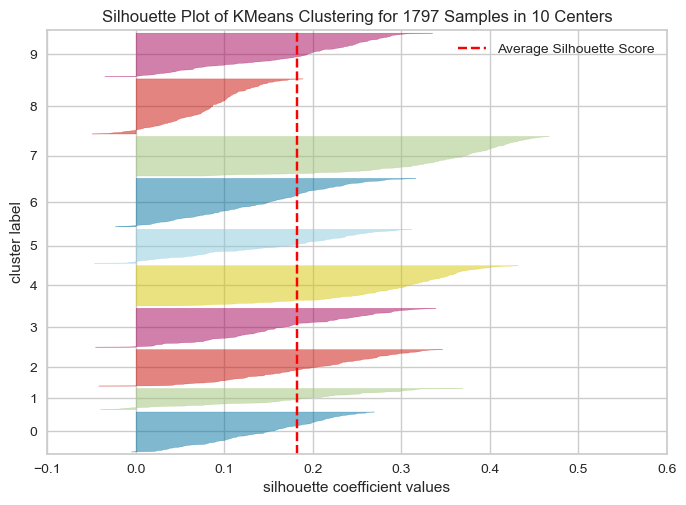

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1797 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(init='random', n_clusters=10, n_init=10,
                                      random_state=0))

In [47]:
silhouette_visualizer(kmeans_model, X, colors='yellowbrick')

In SilhouetteVisualizer plots, clusters with higher scores have wider silhouettes, but clusters that are less cohesive will fall short of the average score across all clusters, which is plotted as a vertical dotted red line.

### ⚠ Attention!
- Tthe Silhouette Score may not be the best index to evaluate every clustering solution, read here: [Is Silhouette the Right Clustering Evaluation Metric for You?](https://medium.com/@giannispoy/is-silhouette-the-right-clustering-evaluation-metric-for-you-dcfdbb268be4)
- Each Evaluation Metric has actually its own advantages and drawbacks, read here for a complete list of clustering evaluation metrics available in scikit-learn and their characteristics: [Clustering performance evaluation.](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

### Davies-Bouldin Index

The Davies-Bouldin (DB) Index is defined as:
$$ DB = \frac{1}{k} \sum_{i=1}^k \max_{j \neq i} \left( \frac{\text{avg}_i + \text{avg}_j}{\text{dist}(\text{cent}_i, \text{cent}_j)} \right)$$
Where $k$ is the number of clusters, $\text{avg}_i$ is the average distance from points in cluster $i$ to the centroid $\text{cent}_i$, and $\text{dist}(\text{cent}_i, \text{cent}_j)$ is the distance between centroids $i$ and $j$.

**Lower** Davies-Bouldin Index values indicate **better clustering**. Like the Silhouette Score, the **DB index captures both the separation and compactness** of the clusters. This is due to the fact that the distance between the centroids measures the separation, and the average distances from points to their cluster centroids measure the compacteness.

The `davies_bouldin_score()` function is available in `sklearn`:

In [48]:
print(f"Davies-Bouldin score for Agglomerative Clustering: {davies_bouldin_score(X, aggl_model.labels_)}")

Davies-Bouldin score for Agglomerative Clustering: 2.303120200595817


In [49]:
print(f"Davies-Bouldin score for K-Means Clustering: {davies_bouldin_score(X, kmeans_model.labels_)}")

Davies-Bouldin score for K-Means Clustering: 1.9193760207000754


In [50]:
print(f"Davies-Bouldin score for DBSCAN Clustering: {davies_bouldin_score(X, dbscan_model.labels_)}")

Davies-Bouldin score for DBSCAN Clustering: 2.2210667811057343


### Calinski-Harabasz Index (Variance Ratio Criterion)
The Calinski-Harabasz (CH) Index is defined as:
$$CH = \frac{\text{Between-Cluster Variance}}{\text{Within-Cluster Variance}} \times \frac{N - k}{k - 1}$$
Where $N$ is the total number of data points, $k$ is the number of clusters.

**Higher** Calinski-Harabasz Index values indicate **better clustering**.

The `calinski_harabasz_score()` function is available in `sklearn`:

In [ ]:
print(f"Calinski-Harabasz score for Agglomerative Clustering: {calinski_harabasz_score(X, aggl_model.labels_)}")

In [ ]:
print(f"Calinski-Harabasz score for K-Means Clustering: {calinski_harabasz_score(X, kmeans_model.labels_)}")

In [ ]:
print(f"Calinski-Harabasz score for DBSCAN Clustering: {calinski_harabasz_score(X, dbscan_model.labels_)}")

## Deciding the Number of Clusters

If our data has just 2 or 3 dimensions, then it is possible to visually understand the clusters present in the data. However, in most practical applications we will have more than 3 dimensions. 
If we increase the number **k** of clusters, it will naturally make the average distance smaller. **If every point has its own cluster, then our distance would be 0**. That's obviously not an ideal way to cluster. There are different methods to decide the optimal number of **k** clusters: 
- Elbow Method
- Gap Statistic
- Dendrogram

### Elbow Method

One way to determine a reasonable number of clusters is to simply try many different clusterings as we vary **k**, measure evaluation metrics and plot their values. In the Elbow Method we select the $k$ for which the rate of change in the evaluation metric first starts to slow down.

We can use the `kelbow_visualizer` function from Yellowbrick which **by default uses the inertia**:

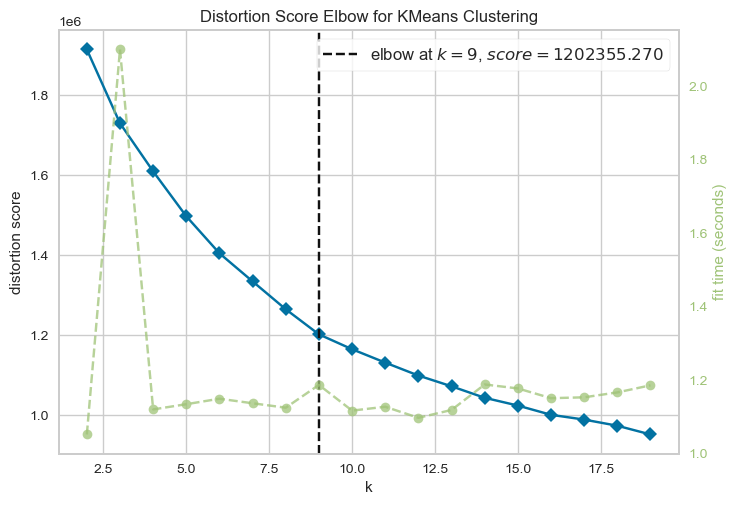

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(init='random', n_clusters=19, n_init='auto',
                                  random_state=109),
                 k=(2, 20))

In [51]:
kelbow_visualizer(KMeans(init='random', n_init='auto', random_state=109), X, k=(2,20))

The `kelbow_visualizer` function fits the KMeans model for a range of clusters values between 2 to 20. As shown in the figure, the elbow point is achieved with 9 clusters which is highlighted by the function itself. The function also informs us about how much time was needed to plot models for various numbers of clusters through the green line.

We can also use other metrics, like the **Silhouette Score**:

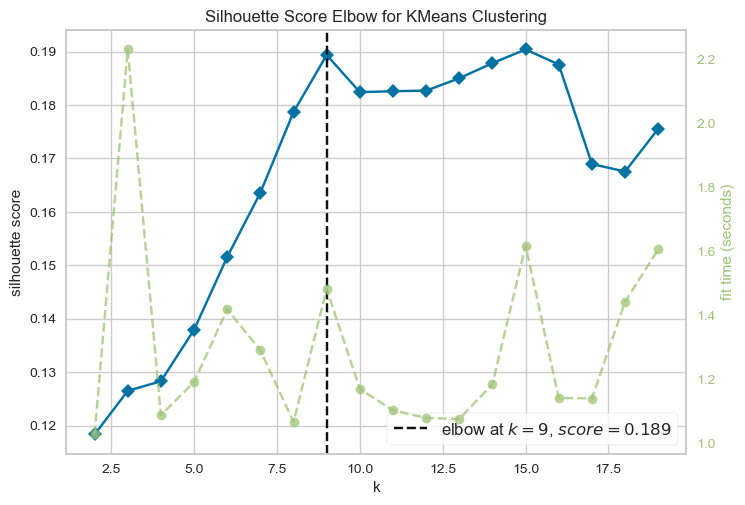

KElbowVisualizer(ax=<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(init='random', n_clusters=19, n_init='auto',
                                  random_state=109),
                 k=(2, 20), metric='silhouette')

In [52]:
kelbow_visualizer(KMeans(init='random', n_init='auto', random_state=109), X, k=(2,20), metric='silhouette')

Now with the **Calinski-Harabasz Score**:

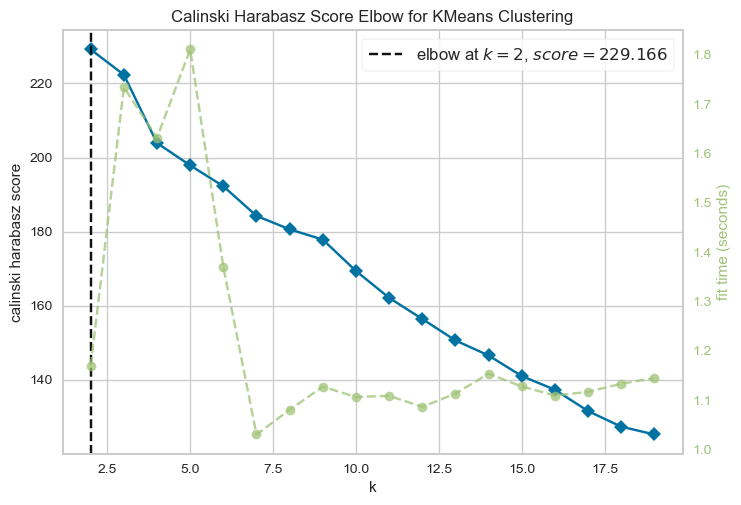

KElbowVisualizer(ax=<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>,
                 estimator=KMeans(init='random', n_clusters=19, n_init='auto',
                                  random_state=109),
                 k=(2, 20), metric='calinski_harabasz')

In [53]:
kelbow_visualizer(KMeans(init='random', n_init='auto', random_state=109), X, k=(2,20), metric='calinski_harabasz')

Finally with the **Davies Bouldin Score** (there is not a Yellowbrick function):

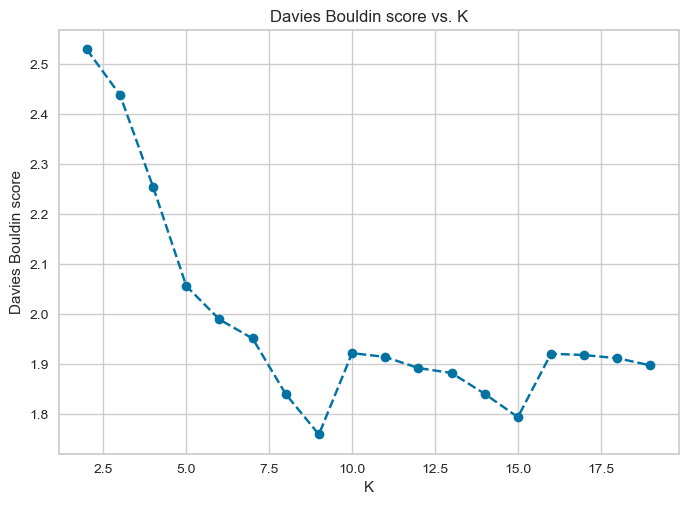

In [37]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, k):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        k - the number of clusters
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    # instantiate kmeans
    kmeans = KMeans(n_clusters=k, init='random', n_init='auto', random_state=109)  # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

scores = []
ks = list(range(2,20))
for k in ks:
    scores.append(get_kmeans_score(X, k))
    
plt.plot(ks, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

### Gap Statistic

The gap statistic compares within-cluster distances (such as in silhouette), but instead of comparing against the second-best existing cluster for that point, **it compares our clustering's overall average to the average we'd see if the data were generated at random** (we'd expect randomly generated data to not necessarily have any inherit patterns that can be easily clustered). 

In essence, the within-cluster distances (in the elbow plot) will go down just becuse we have more clusters. We additionally calculate how much they'd go down on non-clustered data with the same spread as our data and subtract that trend out to produce the plot below.

The original paper is : "[Estimating the number of clusters in a data set via the gap statistic](https://academic.oup.com/jrsssb/article/63/2/411/7083348)" (Tibshirani et al.).

As suggested in the paper, we would choose the value of $\hat{k}$ (number of clusters) such that

$$\hat{k} = \text{smallest k such that Gap(k)} \geq Gap(k+1) - s_{k+1}$$

We compare the **actual Gap value** of the `k` point to the **lower bar** of the Gap value of the `k+1` point. The following graph should make it clearer. The plot is from the original paper (Fig. 2) (dashed lines are mine) <BR><BR>
<center>
<img src="images/gapstat.jpg" width="500px">
</center>

We could argue that we should have chosen the largest value (k =3) instead of the first value that satisfies the Gap statistic equation (k=1 in this case). If you are able to compute for a range of k, then you can choose the maximum. For example, in the graph above, since we're computing over k=1,...,10, we could choose k=3. The original paper although it suggests that we look at the whole range, chooses k=1 in the case above; if you see the raw data plotted (Fig. 2 in the paper) you will also notice that there is really not much structure for cluster subdivision but we should always investigate the whole plot. Also, it is very computationally intensive to compute the Gap statistic. 
Additionally, you can use domain knowledge or whatever information you have about the data to choose k.

The gap statistic is implemented by Miles Granger in the `gap_statistic` (https://github.com/milesgranger/gap_statistic) Python library. The library also implements the Gap$^*$ statistic described in "A comparison of Gap statistic definitions with and without logarithm function" (https://core.ac.uk/download/pdf/12172514.pdf) (Mohajer, M., Englmeier, K. H., & Schmid, V. J., 2011) which is less conservative but tends to perform suboptimally when clusters overlap.

The default implementation in `gap_statistic` is KMeans, but it allows using any clusting algorithm.

In [54]:
gs_obj = OptimalK()

n_clusters = gs_obj(X, n_refs=500, cluster_array=np.arange(2, 20))
print('Optimal number of clusters: ', n_clusters)

Optimal number of clusters:  18


In [ ]:
def special_clustering_func(X, k):
    """ 
    Special clustering function which uses the K-Means
    model from sklearn.
    
    These user defined functions *must* take the X and a k 
    and can take an arbitrary number of other kwargs, which can
    be pass with `clusterer_kwargs` when initializing OptimalK
    """
    
    # Here you can do whatever clustering algorithm you heart desires,
    # but we'll do a simple wrap of the K-Means model in sklearn.
    
    m =  KMeans(n_clusters=k, init='random', n_init='auto', random_state=109)
    m.fit(X)
    
    # Return the location of each cluster center,
    # and the labels for each point.
    return m.cluster_centers_, m.predict(X)

# Define the OptimalK instance, but pass in our own clustering function
optimalk = OptimalK(clusterer=special_clustering_func)
n_clusters = optimalk(X, n_refs=50, cluster_array=np.arange(2, 20))
print('Optimal number of clusters: ', n_clusters)

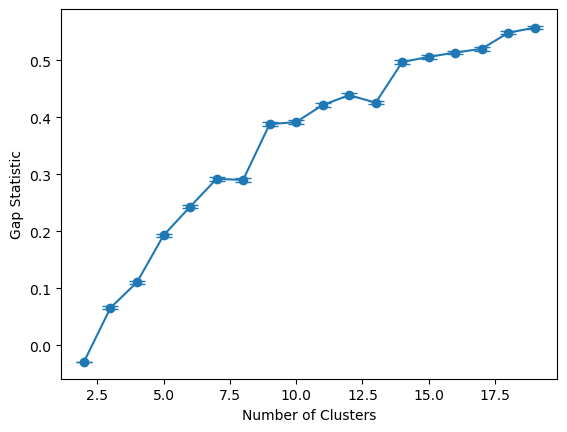

In [36]:
def display_gapstat_with_errbars(gap_df):
    gaps = gap_df["gap_value"].values
    diffs = gap_df["diff"]
    
    err_bars = np.zeros(len(gap_df))
    err_bars[1:] = diffs[:-1] - gaps[:-1] + gaps[1:]

    plt.scatter(gap_df["n_clusters"], gap_df["gap_value"])
    plt.errorbar(gap_df["n_clusters"], gap_df["gap_value"], yerr=err_bars, capsize=6)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Gap Statistic")
    plt.show()
    
display_gapstat_with_errbars(gs_obj.gap_df)

- For more information about the `gap_stat` package, please see [the full documentation here](https://github.com/milesgranger/gap_statistic).
- For another (maybe clearer) explanation of the Gap Statistic [read this StackExchange answer.](https://stats.stackexchange.com/questions/306838/gap-statistic-in-plain-english).

### Dendrogram

This technique is specific to the agglomerative clustering. To get the optimal number of clusters for hierarchical clustering, we make use of the dendrogram. We visually choose a cutting height that create clusters with high dissimilarity by looking at the distance at which the clusters were merged (height of horizontal lines in the dendrogram).

## Comparing Clustering Algorithms on Synthetic Data
[Example from the scikit-learn User Guide.](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)

**This example shows characteristics of different clustering algorithms on datasets that are "interesting"** but still in 2D. With the exception of the last dataset, the parameters of each of these dataset-algorithm pairs has been tuned to produce good clustering results. Some algorithms are more sensitive to parameter values than others.

The last dataset is an example of a "null" situation for clustering: the data is homogeneous, and there is no good clustering. For this example, the null dataset uses the same parameters as the dataset in the row above it, which represents a mismatch in the parameter values and the data structure.

While these examples give some intuition about the algorithms, **this intuition might not apply to very high dimensional data**.

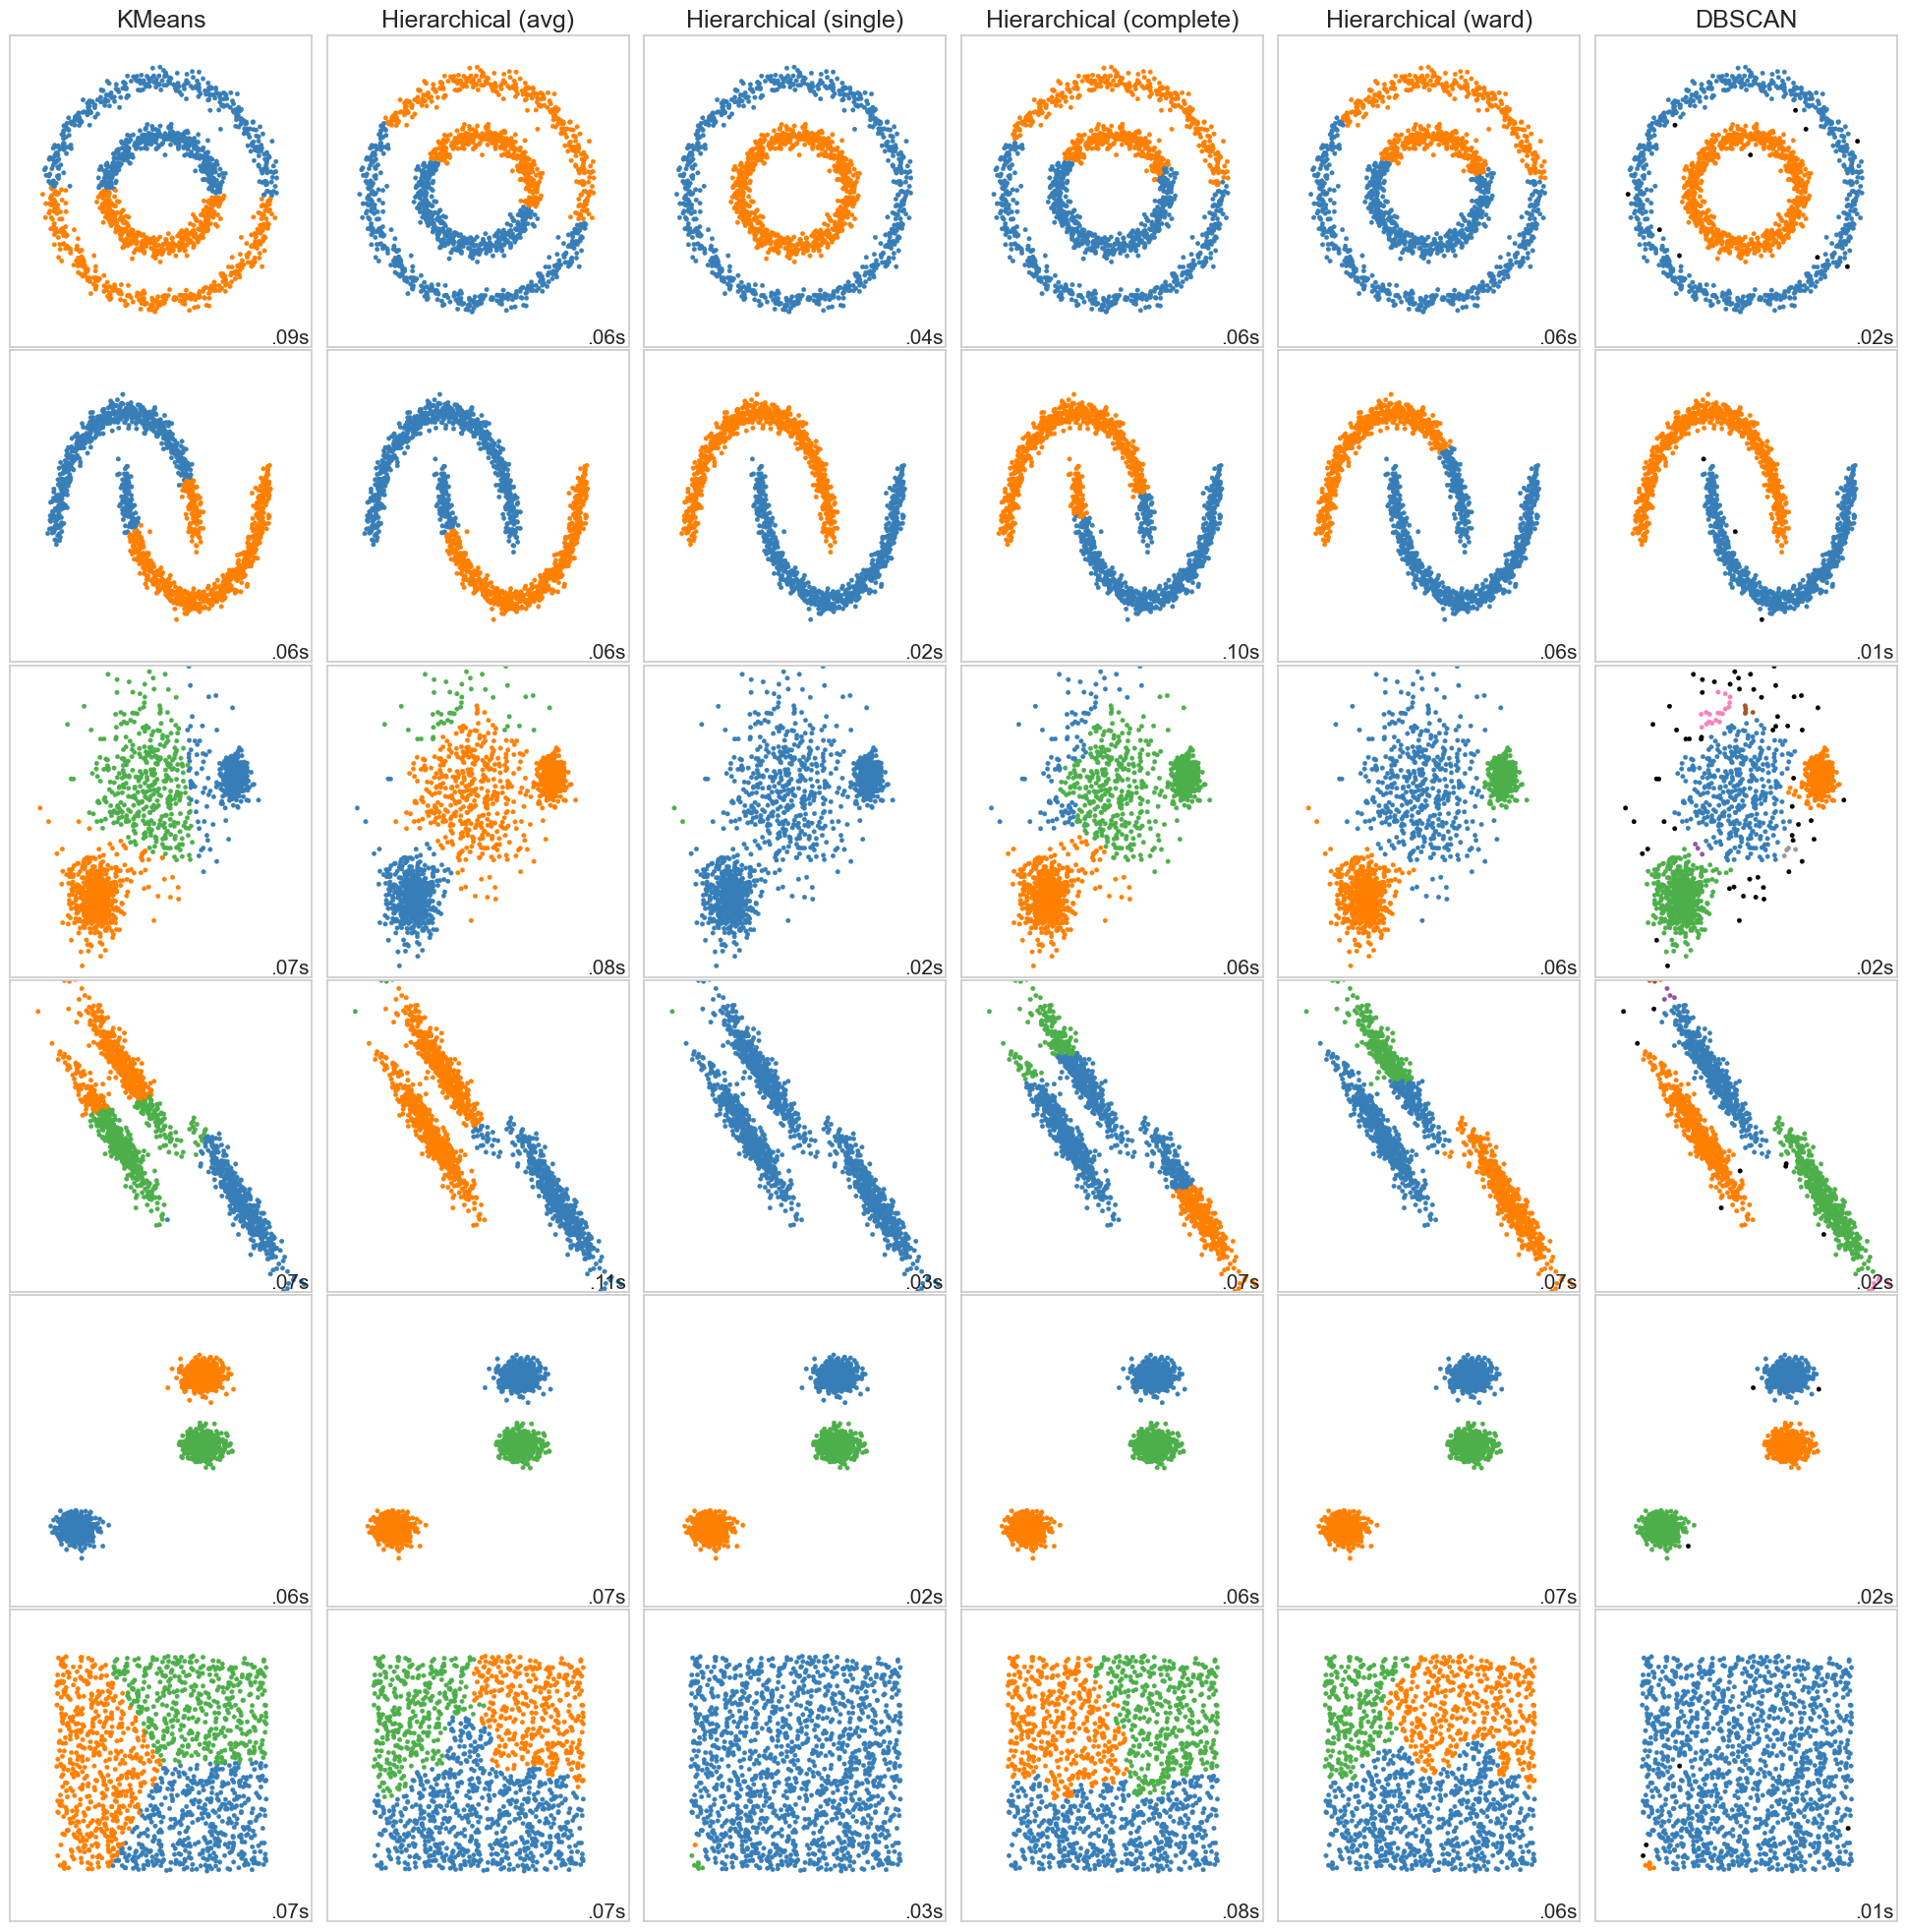

In [38]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
Xd, yd = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(Xd, transformation)
aniso = (X_aniso, yd)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

plt.figure(figsize=(20, 20))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    Xd, yd = dataset

    # normalize dataset for easier parameter selection
    Xd = StandardScaler().fit_transform(Xd)

    # ============
    # Create cluster objects
    # ============
    clustering_algorithms = [
        ('KMeans', cluster.KMeans(n_clusters=params['n_clusters'], n_init='auto')),
        ('Hierarchical (avg)', cluster.AgglomerativeClustering(
                               n_clusters=params['n_clusters'], linkage='average')),
        ('Hierarchical (single)', cluster.AgglomerativeClustering(
                                  n_clusters=params['n_clusters'], linkage='single')),
        ('Hierarchical (complete)', cluster.AgglomerativeClustering(
                                    n_clusters=params['n_clusters'], linkage='complete')),
        ('Hierarchical (ward)', cluster.AgglomerativeClustering(
                                    n_clusters=params['n_clusters'], linkage='ward')),
        ('DBSCAN', DBSCAN(eps=0.14, min_samples=3)),
    ]

    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        algorithm.fit(Xd)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int32)
        else:
            y_pred = algorithm.predict(Xd)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(Xd[:, 0], Xd[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()